In [1]:
library(ggplot2)
library(dplyr)
library(plotly)
library(sf)
library(shiny)
library(leaflet)
#library(leaflet.extras)
library(viridis)  
library(networkD3)
library("dplyr", quietly = TRUE)
library("maps", quietly = TRUE)
library("mapproj", quietly = TRUE)
library("ggplot2", quietly = TRUE)
library("tidyverse", quietly = TRUE)
library("viridis", quietly = TRUE)
library("gridExtra", quietly = TRUE)
library("lubridate", quietly = TRUE)
library("plotly", quietly = TRUE)
library("caret", quietly = TRUE)
library("sf", quietly = TRUE)
library("FNN", quietly = TRUE)
library("foreign", quietly = TRUE)
library("pracma", quietly = TRUE)
library("pROC", quietly = TRUE)
library("stepPlr", quietly = TRUE)
library("nnet", quietly = TRUE)
library("ltm", quietly = TRUE)
library("glmnet", quietly = TRUE)
library("kernlab", quietly = TRUE)
library("scales", quietly = TRUE)
library("zoo", quietly = TRUE)
library("lubridate", quietly = TRUE)
library("chron", quietly = TRUE)
library("stats", quietly = TRUE)
library("shiny", quietly = TRUE)
library("sp", quietly = TRUE)
library("leaflet", quietly = TRUE)
library("RColorBrewer", quietly = TRUE)
library("geojsonio", quietly = TRUE)




Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout


Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE

Loading required package: viridisLite


Attaching package: 'maps'


The following object is masked from 'package:viridis':

    unemp


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v stringr   1.5.1
v lubridate 1.9.3     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
v readr     2.1.5     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x plotly::filter() masks dplyr::filter(), stats::

### Load Data and Preprocess

In [2]:
# Load price paid data.
house_prices <- read.csv("ppdata_lite.csv")

# Load file with postcodes and latitude/longitude
ukpostcodes <- read.csv("ukpostcodes.csv", header = TRUE, sep = ',')

# Create GeoJSON file
house_prices <- merge(house_prices, ukpostcodes, by = "postcode")

In [3]:
colnames(house_prices)

[1] "postcode"                      "transaction_unique_identifier"
 [3] "price"                         "date_of_transfer"             
 [5] "property_type"                 "old_new"                      
 [7] "duration"                      "PAON"                         
 [9] "SAON"                          "street"                       
[11] "locality"                      "town_city"                    
[13] "district"                      "county"                       
[15] "PPD_category_type"             "record_status"                
[17] "id"                            "latitude"                     
[19] "longitude"

In [4]:
# print first 5 rows
head(house_prices)

,postcode,transaction_unique_identifier,price,date_of_transfer,property_type,old_new,duration,PAON,SAON,street,locality,town_city,district,county,PPD_category_type,record_status,id,latitude,longitude
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
1,AL1 1AJ,{F42AB372-96E9-4C62-A659-77AC8C0EAEDF},159995,1997-07-25 00:00,S,Y,F,28,,ORIENT CLOSE,ST. ALBANS,ST. ALBANS,ST ALBANS,HERTFORDSHIRE,A,A,1578238,51.74448,-0.3285997
2,AL1 1AJ,{4911E580-FE15-43E0-9C80-3A36863ABBC7},300000,2006-09-22 00:00,T,N,F,21,,ORIENT CLOSE,ST. ALBANS,ST. ALBANS,ST ALBANS,HERTFORDSHIRE,A,A,1578238,51.74448,-0.3285997
3,AL1 1AJ,{656892E1-43C7-4CE5-83A3-28DA979FB9F4},143995,1997-06-20 00:00,S,Y,F,17,,ORIENT CLOSE,ST. ALBANS,ST. ALBANS,ST ALBANS,HERTFORDSHIRE,A,A,1578238,51.74448,-0.3285997
4,AL1 1AJ,{B3BA577D-02A6-40BA-9C17-2167A5C27794},435000,2011-06-30 00:00,T,N,F,22,,ORIENT CLOSE,,ST ALBANS,ST ALBANS,HERTFORDSHIRE,A,A,1578238,51.74448,-0.3285997
5,AL1 1AJ,{A0278D4E-0B75-48A7-AAA2-1587E9A7F9BE},158950,1997-10-27 00:00,S,Y,F,2,,ORIENT CLOSE,ST. ALBANS,ST. ALBANS,ST ALBANS,HERTFORDSHIRE,A,A,1578238,51.74448,-0.3285997
6,AL1 1AJ,{6A55C1DF-1633-493F-A38B-3204615D3EE5},139995,1997-06-27 00:00,S,Y,F,20,,ORIENT CLOSE,ST. ALBANS,ST. ALBANS,ST ALBANS,HERTFORDSHIRE,A,A,1578238,51.74448,-0.3285997


___

# Task A

#### A1.  For the 33 London boroughs create a box-plot (or several box-plots) that compares house prices between the boroughs. Can you think of a better way to compare borough house prices (please demonstrate)?

Exploring the time variable by accessing the data per year. 

In [5]:
# filter data for city of london 
city_of_london <- house_prices %>% filter(town_city == "LONDON")

# count number of districts
length(unique(city_of_london$district)) == 33

[1] TRUE

___

Now we create some box plots. There are 33 boroughs so this could get hairy. 

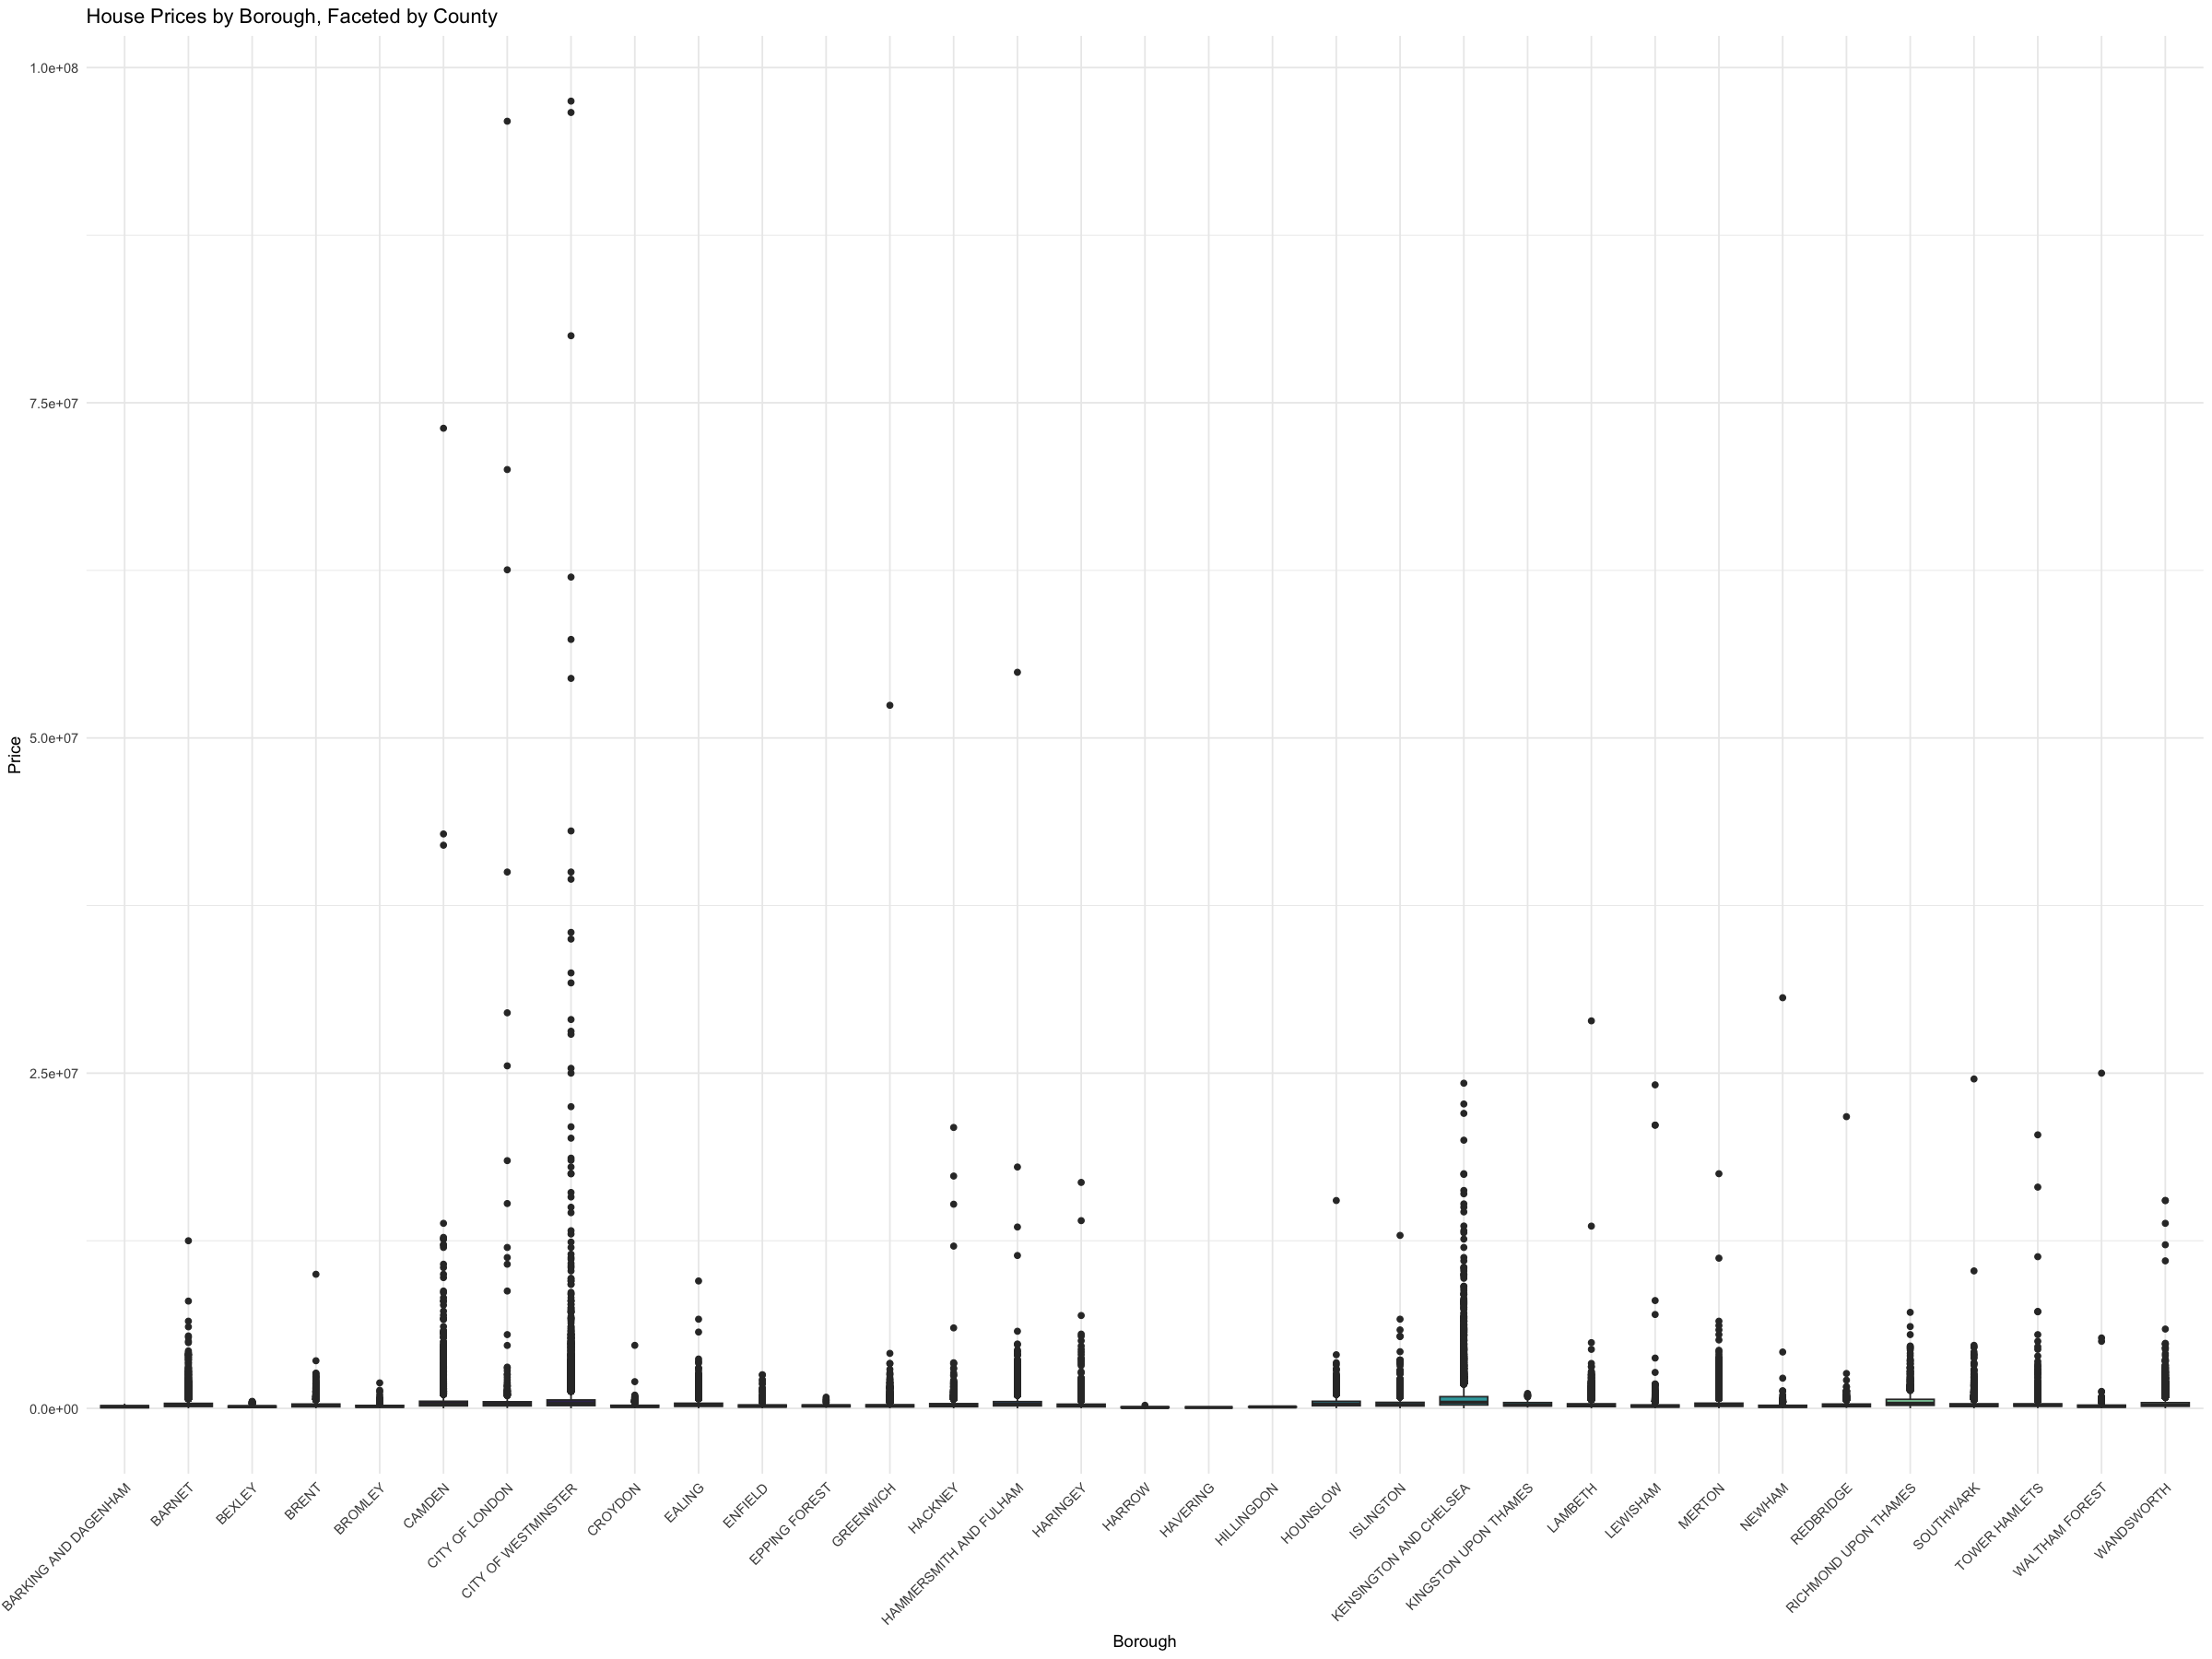

In [6]:
# create box plots by borough of house prices 
# cols = district, price

# increase plot size
options(repr.plot.width=20, repr.plot.height=15)
ggplot(city_of_london, aes(x = district, y = price, fill = district)) +  # Add 'fill = district' to aes()
  geom_boxplot() +
  scale_fill_viridis_d(option = "mako") +  # Apply the 'Magma' palette
  theme_minimal() +
  labs(title = "House Prices by Borough, Faceted by County", x = "Borough", y = "Price") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none",  # Hide legend if each district's color is self-evident
        legend.title = element_blank(),
        strip.text.x = element_text(angle = 45, hjust = 1, vjust = 0.5))


This is not easy to gain any meaningful insight across all of the boroughs; however, we can see that The City of Westminster have an exceedingly high number of high priced home sales. 

___

We now try to remove some outliers to clean up the data further and make it more readable.

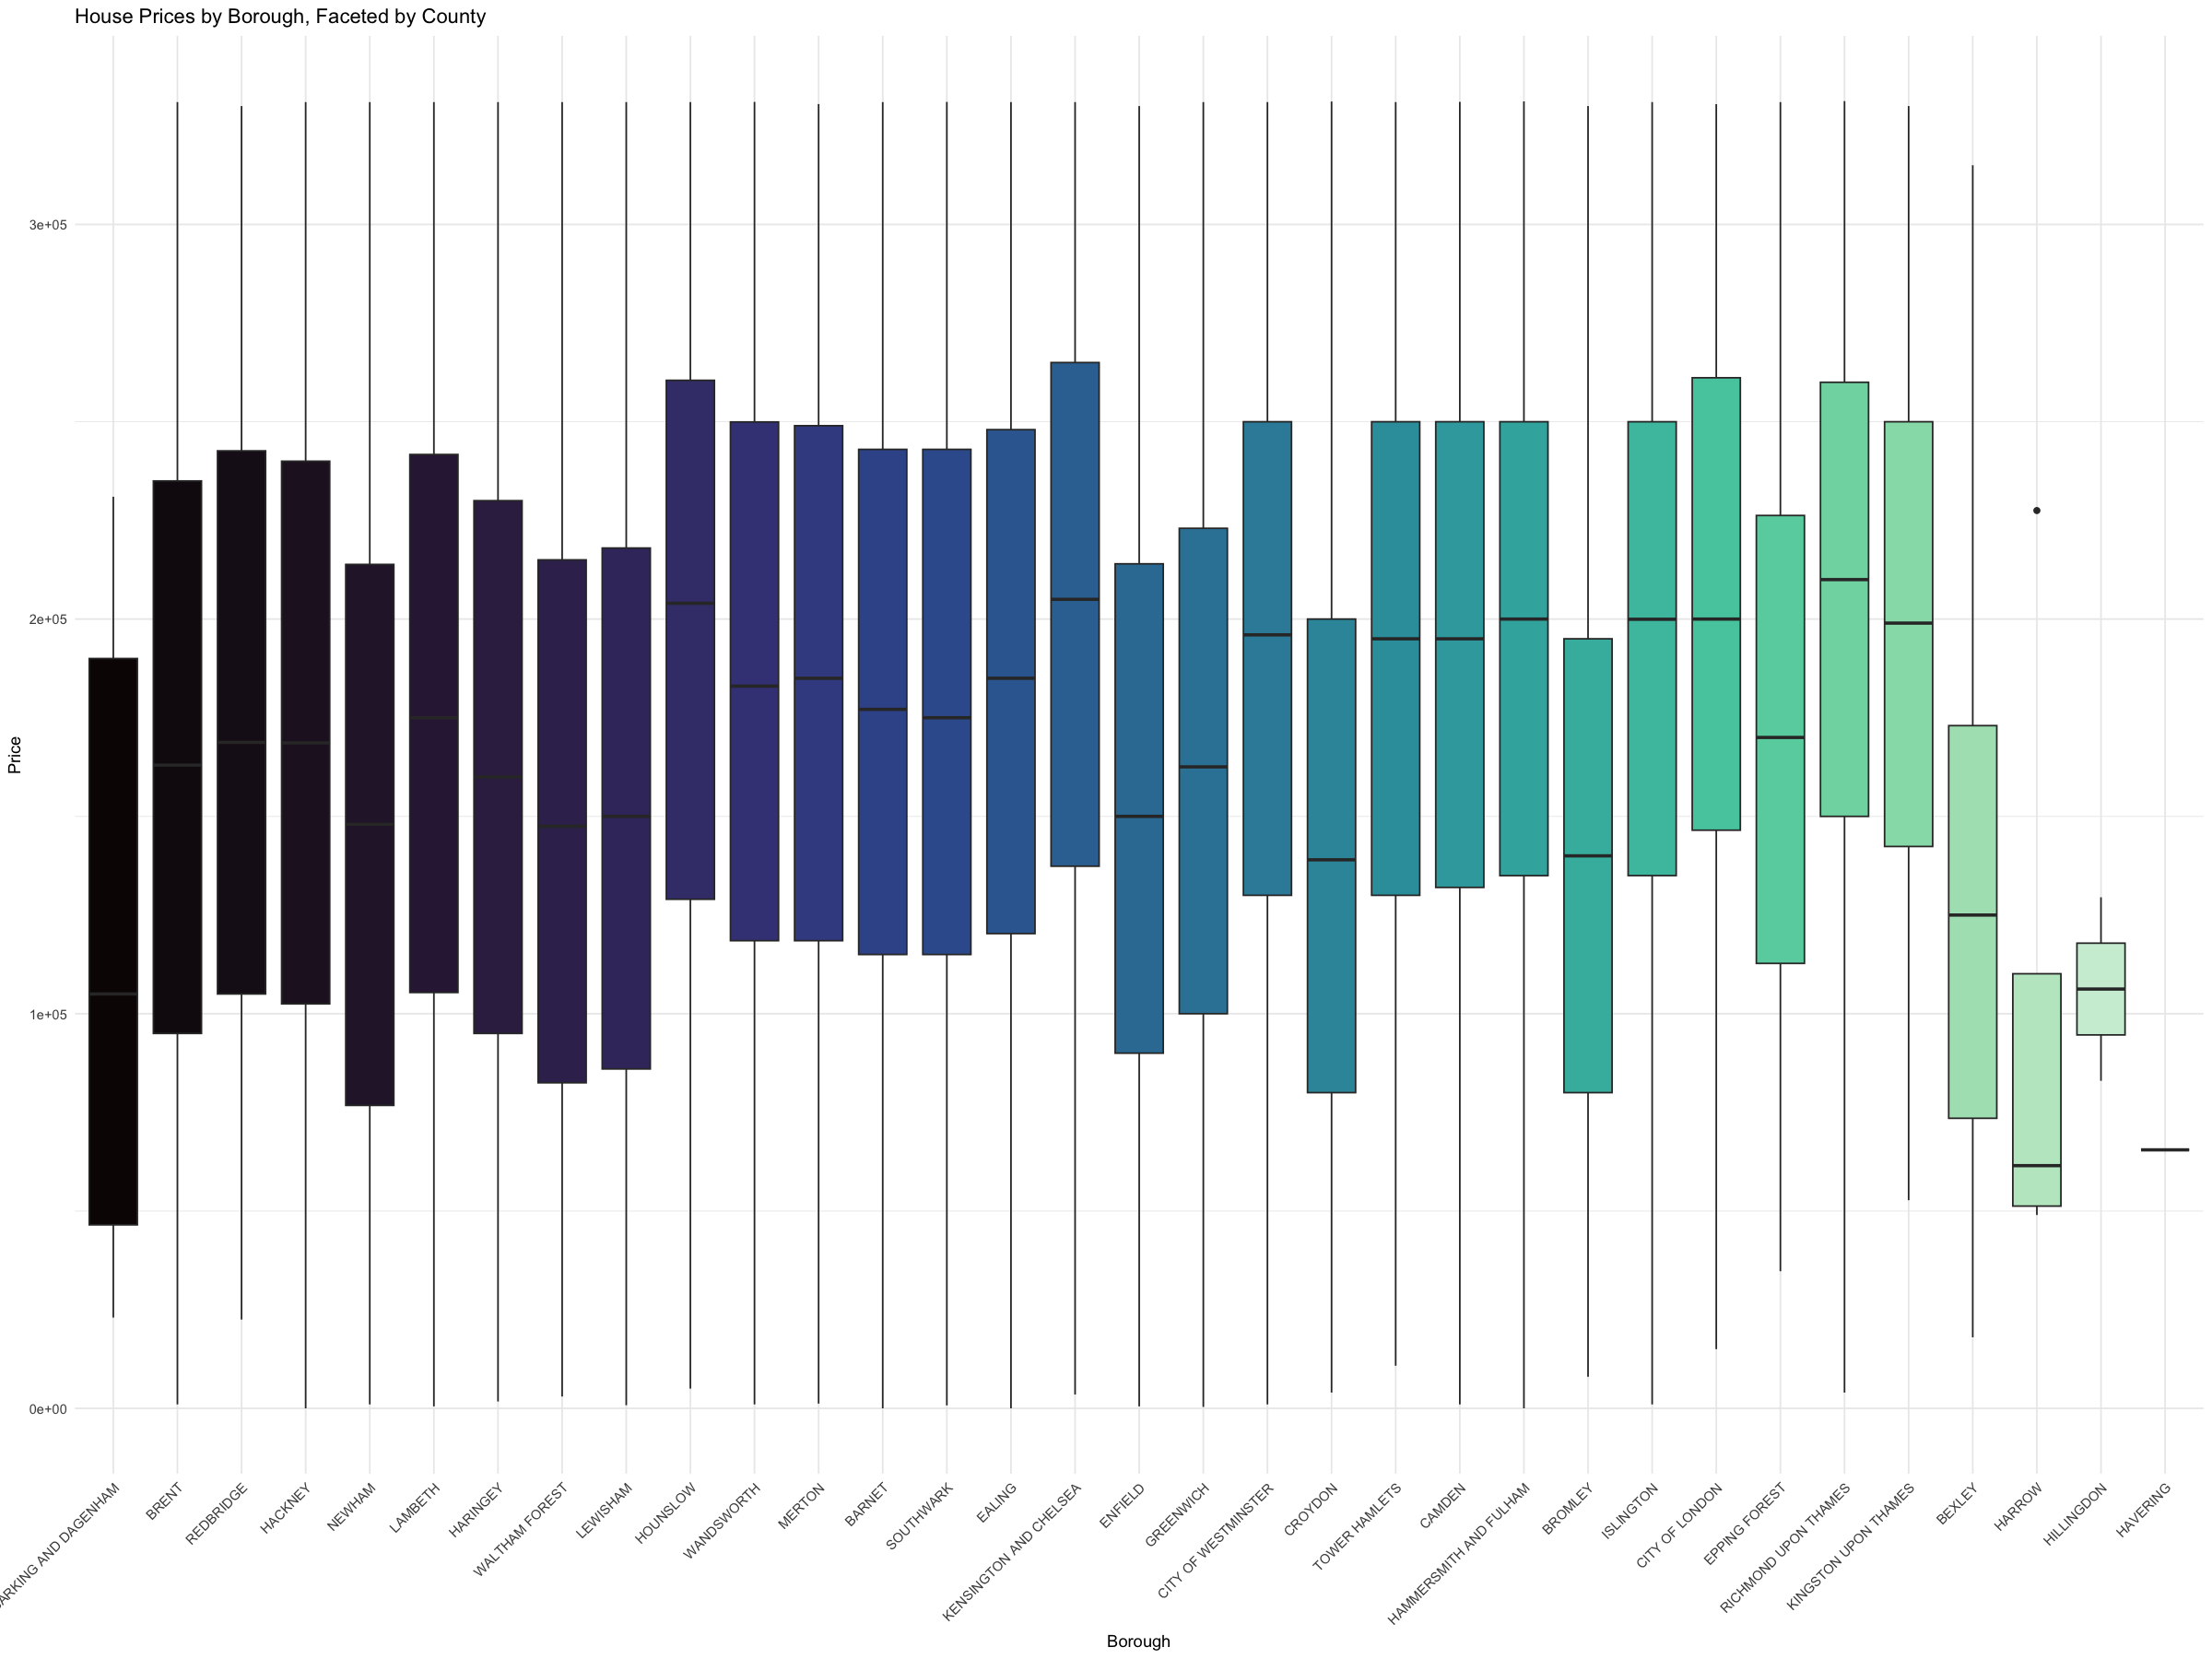

In [7]:
# remove price outliers and plot again

# Calculate the 1st and 3rd quartiles
q1 <- quantile(house_prices$price, 0.25, na.rm = TRUE)
q3 <- quantile(house_prices$price, 0.75, na.rm = TRUE)

# Calculate the interquartile range
iqr <- q3 - q1

# Define the lower and upper bounds
lower_bound <- q1 - 1.5 * iqr
upper_bound <- q3 + 1 * iqr

# Remove outliers
city_of_london_no_outliers <- city_of_london %>%
  filter(price > lower_bound & price < upper_bound)


# increase plot size
options(repr.plot.width=20, repr.plot.height=15)

iqr_data <- city_of_london_no_outliers %>%
  group_by(district) %>%
  summarise(IQR = IQR(price, na.rm = TRUE)) %>%
  arrange(desc(IQR))

city_of_london_no_outliers <- city_of_london_no_outliers %>%
  inner_join(iqr_data, by = "district") %>%
  mutate(district = factor(district, levels = iqr_data$district))

ggplot(city_of_london_no_outliers, aes(x = district, y = price, fill = district)) +  # Add 'fill = district' to aes()
  geom_boxplot() +
  scale_fill_viridis_d(option = "mako") +  # Apply the 'Magma' palette
  theme_minimal() +
  labs(title = "House Prices by Borough, Faceted by County", x = "Borough", y = "Price") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none",  # Hide legend if each district's color is self-evident
        legend.title = element_blank(),
        strip.text.x = element_text(angle = 45, hjust = 1, vjust = 0.5))


The mean for most of these counties sits around 170,000, and typically varies between 150,000 and 200,000. The upper quartile of the cleaned up data is around 250,000, and the lower quartile is around 100,000. There is some clear outliers, but this may be due to subsetted data. 


___

Here we try to compare the house prices between the boroughs with a bar chart instead of box plots. This might be easier to see outright trends in the average house prices rather than the distributions that the box plots show.

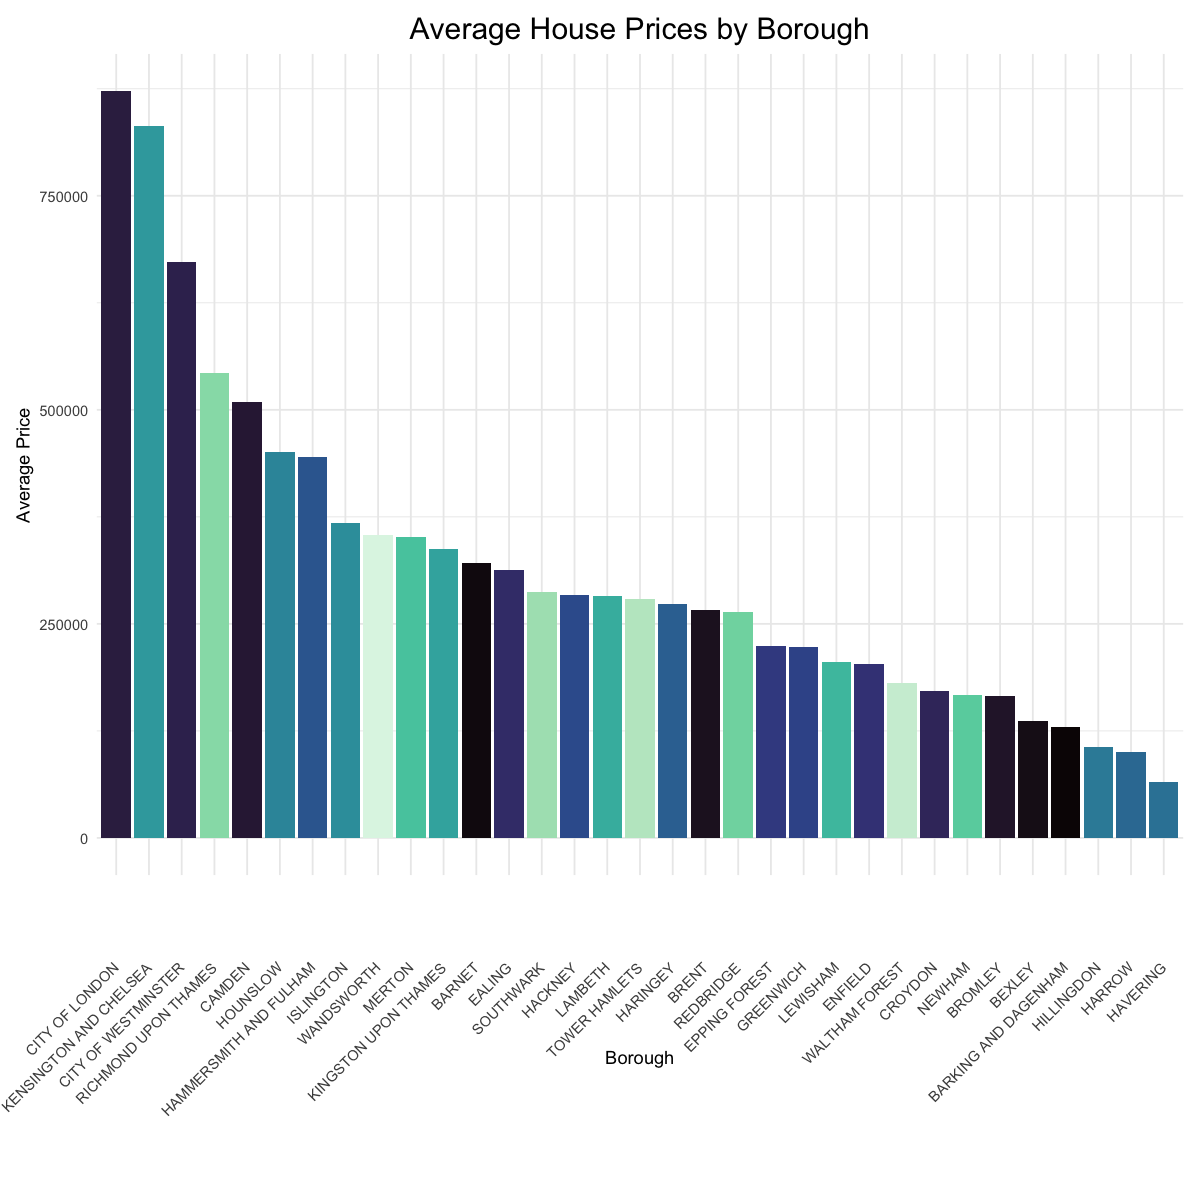

In [8]:
# bar chart of house prices by borough sorted
# cols = district, price
avg_prices <- city_of_london %>%
  group_by(district) %>%
  summarise(average_price = mean(price, na.rm = TRUE)) %>%
  arrange(desc(average_price))

options(repr.plot.width=10, repr.plot.height=10)

ggplot(avg_prices, aes(x=reorder(district, -average_price), y=average_price, fill=district)) +
  geom_bar(stat="identity") +
  scale_fill_viridis_d(option='mako') +  # Assuming this is your desired color scale
  labs(title = "Average House Prices by Borough", x = "Borough", y = "Average Price") +
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 0.5),  # Adjust x-axis labels
        legend.position = "none",  # Hide the legend
        plot.title = element_text(hjust = 0.5, size=18),  # Center the plot title
        plot.margin = margin(t = 10, r = 10, b = 80, l = 10, unit = "pt"))  # Adjust plot margins


Here we can see more clearly the distribution of the average house prices in the boroughs. We can see that the average house prices in Kensington and Chelsea, City of London, and City of Westminster, are significatly higher than other boroughs, and Havering is much lower than the other boroughs. The interesting statistic is that there is a 12000% difference between the average house prices in the City of London and Havering.

___

#### A2. Could the entire dataset be used to estimate the relationship between price of flats and floor level? If yes, how would you show that relationship in a plot?

### Preprocess

In [9]:
flat_data <- city_of_london %>% filter(`property_type` == 'F', `SAON` != "")

floor_mappings <- c(
  "lower" = "-1 Basement",
  "ground" = "0 Ground Floor",
  "first" = "1 First Floor",
  "second" = "2 Second Floor",
  "third" = "3 Third Floor",
  "fourth" = "4 Fourth Floor",
  "fifth" = "5 Fifth Floor",
  "sixth" = "6 Sixth Floor",
  "seventh" = "7 Seventh Floor",
  "eigth" = "8 Eigth Floor",
  "ninth" = "9 Ninth Floor",
  "1" = "1 First Floor",
  "2" = "2 Second Floor",
  "3" = "3 Third Floor",
  "4" = "4 Fourth Floor",
  "5" = "5 Fifth Floor",
  "6" = "6 Sixth Floor",
  "7" = "7 Seventh Floor",
  "8" = "8 Eigth Floor",
  "9" = "9 Ninth Floor"
)

# Use mutate and case_when to create a new column 'mapped_floor'
flat_data <- flat_data %>%
  mutate(floor = case_when(
    str_detect(tolower(SAON), "lower") ~ floor_mappings["lower"],
    str_detect(tolower(SAON), "ground") ~ floor_mappings["ground"],
    str_detect(tolower(SAON), "first") ~ floor_mappings["first"],
    str_detect(tolower(SAON), "second") ~ floor_mappings["second"],
    str_detect(tolower(SAON), "third") ~ floor_mappings["third"],
    str_detect(tolower(SAON), "fourth") ~ floor_mappings["fourth"],
    str_detect(tolower(SAON), "fifth") ~ floor_mappings["fifth"],
    str_detect(tolower(SAON), "sixth") ~ floor_mappings["sixth"],
    str_detect(tolower(SAON), "seventh") ~ floor_mappings["seventh"],
    str_detect(tolower(SAON), "eight") ~ floor_mappings["eigth"],
    str_detect(tolower(SAON), "ninth") ~ floor_mappings["ninth"],
    str_detect(tolower(SAON), "1st") ~ floor_mappings["first"],
    str_detect(tolower(SAON), "2nd") ~ floor_mappings["second"],
    str_detect(tolower(SAON), "3rd") ~ floor_mappings["third"],
    str_detect(tolower(SAON), "4th") ~ floor_mappings["fourth"],
    str_detect(tolower(SAON), "5th") ~ floor_mappings["fifth"],
    str_detect(tolower(SAON), "6th") ~ floor_mappings["sixth"],
    str_detect(tolower(SAON), "7th") ~ floor_mappings["seventh"],
    str_detect(tolower(SAON), "8th") ~ floor_mappings["eigth"],
    str_detect(tolower(SAON), "9th") ~ floor_mappings["ninth"],
    
    TRUE ~ NA_character_
  ))

# Use mutate and case_when to fill in the remaining empty 'floor' values
flat_data <- flat_data %>%
  mutate(floor = case_when(
    !is.na(floor) ~ floor,  # Keep the existing values
    TRUE ~ floor_mappings[as.character(str_extract(SAON, "\\d"))]  # Extract the first number as the floor
  ))

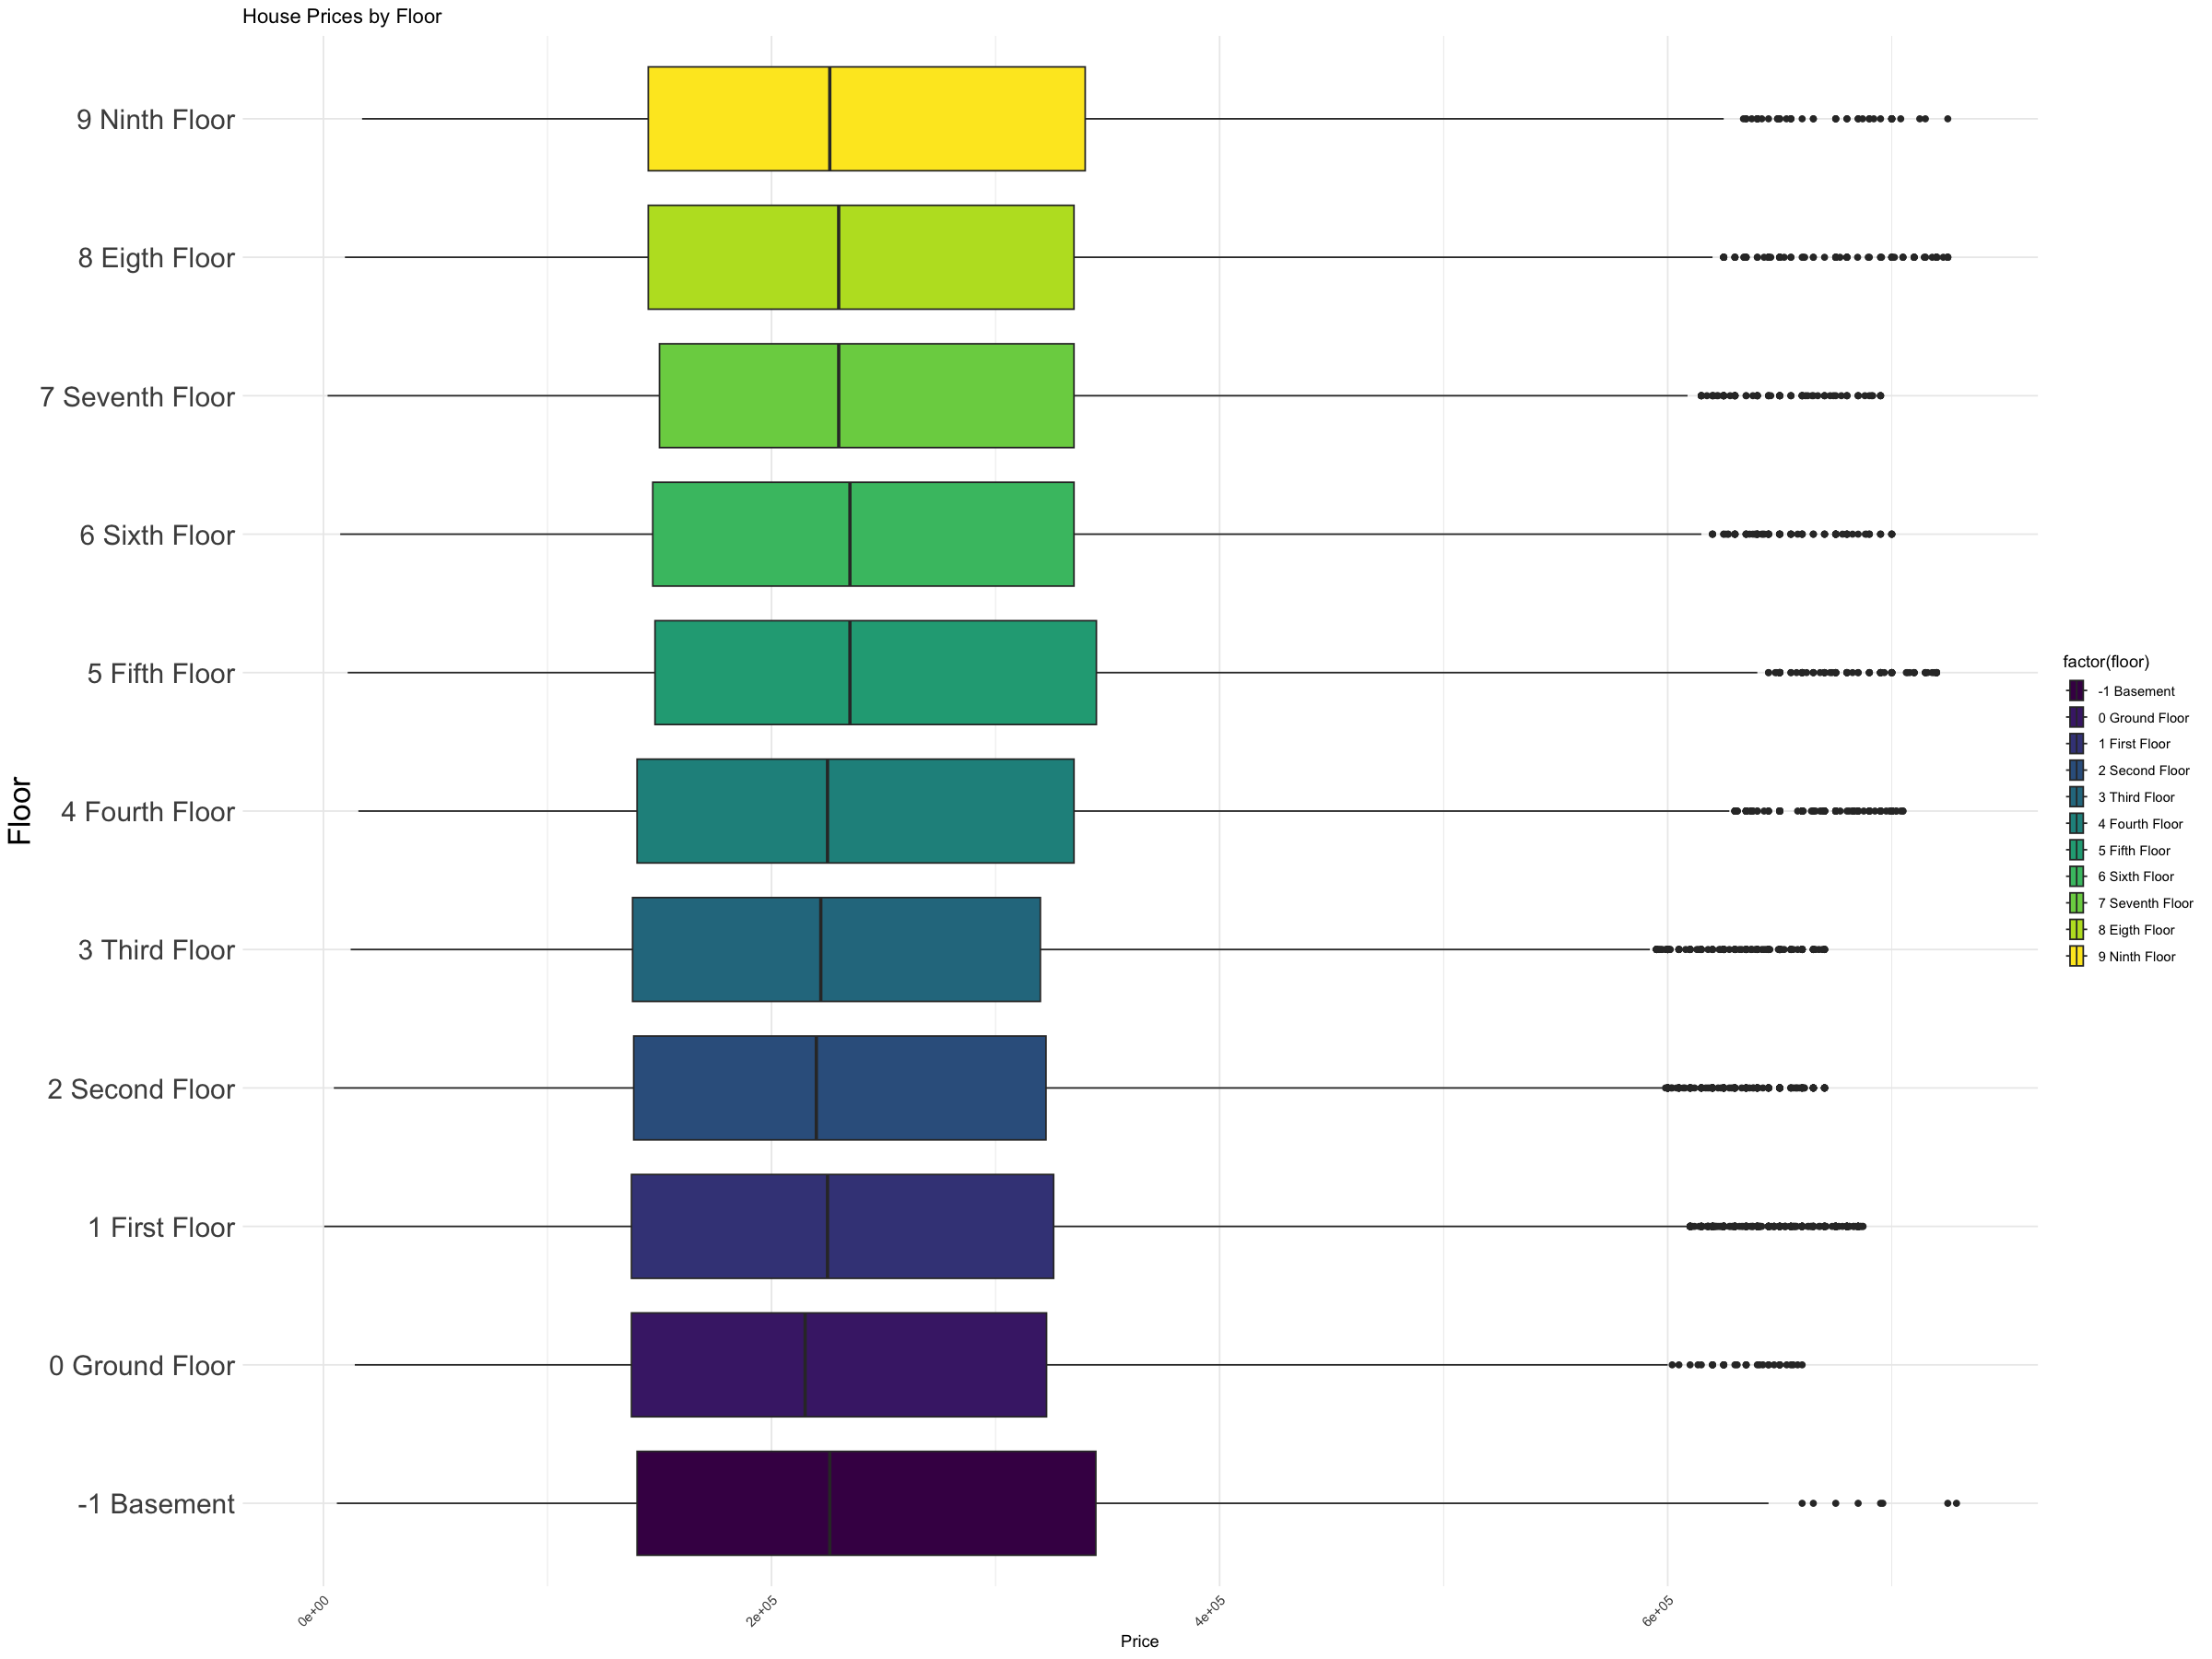

In [10]:

# Unique floors in the data
unique_floors <- unique(flat_data$floor)

# Create an empty data frame to store the cleaned data
cleaned_data <- data.frame()

# Iterate through each unique floor
for (floor_value in unique_floors) {
  # Subset data for the current floor
  subset_data <- flat_data %>% filter(floor == floor_value)
  q <- quantile(subset_data$price, c(0.25, 0.75))
  iqr <- q[2] - q[1]
  lower_bound <- q[1] - 1.5 * iqr
  upper_bound <- q[2] + 1.5 * iqr
  
  # Identify Outliers
  subset_data$outlier <- ifelse(subset_data$price < lower_bound | subset_data$price > upper_bound, 1, 0)
  
  # Append the cleaned data to the result data frame
  cleaned_data <- rbind(cleaned_data, subset_data)
}

cleaned_data <- cleaned_data %>% filter(outlier == 0)

options(repr.plot.width=20, repr.plot.height=15)
# Separate box plots for each borough

ggplot(cleaned_data, aes(x = price, y = factor(floor), fill = factor(floor))) +
  geom_boxplot() +
  scale_fill_viridis_d() +
  labs(title = "House Prices by Floor", x = "Price", y = "Floor") +  # Swapped x and y labels to match the aes mapping
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),  # Adjust for readability
        axis.text.y = element_text(size = 18),  # Increase y-axis text size
        axis.title.y = element_text(size = 20))  # Increase y-axis label size

After the 4th floor there is significant evidence that house prices have a noticeable increase in value. The basement surprisingly has a higher average price than the ground floor, but may be due to large Other commercial sales. 

# Task B

#### B1. Create a GeoJSON file where each postcode is represented with a latitude, longitude value, together with minimum, maximum, mean and median house price.

In [11]:
# remove outliers from house price data
# cols = price

# Calculate the 1st and 3rd quartiles
q1 <- quantile(house_prices$price, 0.25, na.rm = TRUE)
q3 <- quantile(house_prices$price, 0.75, na.rm = TRUE)

# Calculate the interquartile range
iqr <- q3 - q1

# Define the lower and upper bounds
lower_bound <- q1 - 1.5 * iqr
upper_bound <- q3 + 1 * iqr

# Remove outliers
house_prices_no_outliers <- house_prices %>%
  filter(price > lower_bound & price < upper_bound)


In [12]:
# Convert the dataframe to an sf object
avg_prices <- house_prices_no_outliers %>%
  group_by(postcode, latitude, longitude) %>%
  summarize(
    max_price = max(price, na.rm = TRUE),
    mean_price = mean(price, na.rm = TRUE),
    median_price = median(price, na.rm = TRUE),
    min_price = min(price, na.rm = TRUE)
  ) %>%
  arrange(desc(mean_price))


uk_geojson <- st_as_sf(avg_prices, coords = c("longitude", "latitude"), crs = 4326)
st_write(uk_geojson, "uk_prices.geojson", driver = "GeoJSON")


`summarise()` has grouped output by 'postcode', 'latitude'. You can override
using the `.groups` argument.


Layer uk_prices in dataset uk_prices.geojson already exists:
use either append=TRUE to append to layer or append=FALSE to overwrite layer


ERROR: Error in eval(expr, envir, enclos): Dataset already exists.



#### B2. Open the GeoJSON file in the GIS application of your choice and colour-code the data to give an overview of areas with high, medium and low median house price. Additionally, you can visualise this information as cloropleths or use shiny and add the information as markers on a map for a more interactive and impressive result.

In [15]:
uk_geojson = st_read("ukprices_geojson.geojson")


Reading layer `prices_ukpostcodes' from data source 
  `/Users/andrewbennett/Documents/bse/term2/data_visualization/final_project/ukprices_geojson.geojson' 
  using driver `GeoJSON'
Simple feature collection with 818952 features and 6 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 49.76682 ymin: -7.557163 xmax: 55.78707 ymax: 1.758131
Geodetic CRS:  WGS 84


In [16]:

# Change latitude and longitude in geo_data
uk_geojson$longitude <- st_coordinates(uk_geojson)[, 2]
uk_geojson$latitude <- st_coordinates(uk_geojson)[, 1]
df <- st_sf(uk_geojson) %>% st_set_geometry(NULL)
colnames(df)[which(colnames(df) == "longitude")] <- 'Latitude'
colnames(df)[which(colnames(df) == "latitude")] <- 'Longitude'
sf_data <- st_as_sf(df, coords = c("Latitude", "Longitude"), crs = 4326)

# London map
london_map <- st_read('London-wards-2018_ESRI/London_Ward.shp')
london_map <- st_transform(london_map, st_crs(uk_geojson))

joined_data <- st_join(sf_data, london_map, join = st_intersects)

# Convert joined_data to a data frame
joined_df <- as.data.frame(joined_data)
joined_df <- joined_df %>% dplyr::select(NAME, max_price, mean_price, median_price, min_price)
write.csv(joined_df, 'joined_df.csv', row.names = FALSE)


grouped_data <- joined_df %>%
  group_by(NAME) %>%
  summarize(
    max_price = max(max_price, na.rm = TRUE),
    mean_price = mean(mean_price, na.rm = TRUE),
    median_price = median(median_price, na.rm = TRUE),
    min_price = min(min_price, na.rm = TRUE)
  )

london_map <- merge(london_map, grouped_data, by = "NAME", all.x = TRUE)


Reading layer `London_Ward' from data source 
  `/Users/andrewbennett/Documents/bse/term2/data_visualization/final_project/London-wards-2018_ESRI/London_Ward.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 657 features and 6 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 503568.2 ymin: 155850.8 xmax: 561957.5 ymax: 200933.9
Projected CRS: OSGB36 / British National Grid


In [18]:
# Define the color palette
mako_cmap <- colorRampPalette(c("#3B4CC0", "#FBE723"))(100)

# Define UI
ui <- fluidPage(
  titlePanel("London Map Visualization"),
  
  sidebarLayout(
    sidebarPanel(
      radioButtons("color_by",
                   "Color by:",
                   choices = c("Mean Price", "Median Price", "Max Price", "Min Price"),
                   selected = "Mean Price"),
      checkboxGroupInput("districts",
                         "Select Districts to Display:",
                         choices = unique(london_map$DISTRICT),
                         selected = unique(london_map$DISTRICT))
    ),
    
    mainPanel(
      plotOutput("mapPlot", height = "800px", width = "100%")
    )
  )
)

# Define server logic
server <- function(input, output) {
  
  output$mapPlot <- renderPlot({
    # Filter london_map based on selected districts
    filtered_map <- london_map[london_map$DISTRICT %in% input$districts, ]
    
    # Determine which variable to use for coloring
    color_var <- switch(input$color_by,
                        "Mean Price" = "mean_price",
                        "Max Price" = "max_price",
                        "Min Price" = "min_price",
                        "Median Price" = "median_price")
    
    # Plot filtered london_map and color the areas by selected variable
    ggplot() +
      geom_sf(data = filtered_map %>% filter(!is.na(min_price)), aes_string(fill = color_var), color = "black") +
      scale_fill_gradient(name = input$color_by, low = mako_cmap[1], high = mako_cmap[100]) +
      theme_minimal()
  })
}

# Run the application
shinyApp(ui = ui, server = server)


Listening on http://127.0.0.1:3574

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
i Please use tidy evaluation idioms with `aes()`.
i See also `vignette("ggplot2-in-packages")` for more information."


It is highly evident that the City and County of the City of London has significantly higher house prices than the rest of the boroughs. Even after removing the borough, there is high concentration of the highest house prices in the boroughs surrounding the City and County of the City of London. 

#### B3. Instead of using median price, you could have been asked to colour-code the mean house price. Would that have given a better view of the house prices across the UK? Please justify your answer.

In [22]:

gb1_map <- st_read('LAU1_Jan_2018_GCB_UK_2022_6234476927883488821/LAU1_Jan_2018_GCB_UK.shp')
gb1_map <- st_transform(gb1_map, st_crs(uk_geojson))
joined_data <- st_join(sf_data, gb1_map, join = st_intersects)

# Convert joined_data to a data frame
joined_df <- as.data.frame(joined_data)
joined_df <- joined_df %>% dplyr::select(lau118nm, max_price, mean_price, median_price, min_price)
write.csv(joined_df, 'joined_df.csv', row.names = FALSE)

grouped_data <- joined_df %>%
  group_by(lau118nm) %>%
  summarize(
    max_price = max(max_price, na.rm = TRUE),
    mean_price = mean(mean_price, na.rm = TRUE),
    median_price = median(median_price, na.rm = TRUE),
    min_price = min(min_price, na.rm = TRUE)
  )

gb1_map <- merge(gb1_map, grouped_data, by = "lau118nm", all.x = TRUE)
gb1_map$london <- ifelse(gb1_map$lau118cd %in% unique(london_map$LAGSSCODE), "City of London", "Outside of City of London")

# Define the color palette
mako_cmap <- colorRampPalette(c("#3B4CC0", "#FBE723"))(100)


Reading layer `LAU1_Jan_2018_GCB_UK' from data source 
  `/Users/andrewbennett/Documents/bse/term2/data_visualization/final_project/LAU1_Jan_2018_GCB_UK_2022_6234476927883488821/LAU1_Jan_2018_GCB_UK.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 400 features and 7 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -69.6978 ymin: 5342.7 xmax: 655644.8 ymax: 1220302
Projected CRS: OSGB36 / British National Grid


In [23]:

# Define UI
ui <- fluidPage(
  titlePanel("UK Map Housing Prices"),
  
  sidebarLayout(
    sidebarPanel(
      radioButtons("color_by",
                   "Color by:",
                   choices = c("Mean Price", "Median Price", "Max Price", "Min Price"),
                   selected = "Mean Price"),
      checkboxGroupInput("London",
                         "Select London City:",
                         choices = unique(gb1_map$london),
                         selected = unique(gb1_map$london)),
      checkboxGroupInput("zones",
                         "Select Zone to Display:",
                         choices = unique(gb1_map$lau118nm),
                         selected = unique(gb1_map$lau118nm))
    ),
    
    mainPanel(
      plotOutput("mapPlot", height = "800px", width = "100%")
    )
  )
)

# Define server logic
server <- function(input, output) {
  
  output$mapPlot <- renderPlot({
    # Filter gb1_map based on selected zones and London
    filtered_map <- gb1_map %>%
      filter(lau118nm %in% input$zones) %>%
      filter(london %in% input$London)
    
    # Determine which variable to use for coloring
    color_var <- switch(input$color_by,
                        "Mean Price" = "mean_price",
                        "Max Price" = "max_price",
                        "Min Price" = "min_price",
                        "Median Price" = "median_price")
    
    # Plot filtered gb1_map and color the areas by selected variable
    ggplot() +
      geom_sf(data = filtered_map %>% filter(!is.na(min_price)), aes_string(fill = color_var), color = "black") +
      scale_fill_gradient(name = input$color_by, low = mako_cmap[1], high = mako_cmap[100]) +
      theme_minimal()
  })
}

# Run the application
shinyApp(ui = ui, server = server)


Listening on http://127.0.0.1:3574



The shiny web applications have the functionality of mean, min, max, and median price changing built in. Because the city of London has such high prices, when London is included it is difficult to see the differences in the other boroughs. Therefore, we added an option to remove the city of London from the data, which makes the differences in the other boroughs much more clear. We also kept the same functionality from the previous shiny app, so the user can still see the mean, min, max, and median prices for each borough. This could be due to any skew by the outliers of the dataset which would be less sensitive with the median value. Max price is also interesting because it has very high priced houses in the middle of the countryside. This may be due to large manor houses or other large farm like properties. 

# Task C

#### C1. Examine the house prices for the years 2015 and 2019. How do these change over time? Do property prices seem to increase or decrease throughout these year?

need to read in last half of csv so I can see 2015-2019 data.

In [5]:
# read only last half of csv file 
house_prices_2 <- read.csv("ppdata_2015_2019.csv")

In [6]:
# get only years 2015 and 2019
house_prices_2 <- house_prices_2 %>% filter(year %in% c(2015, 2019))

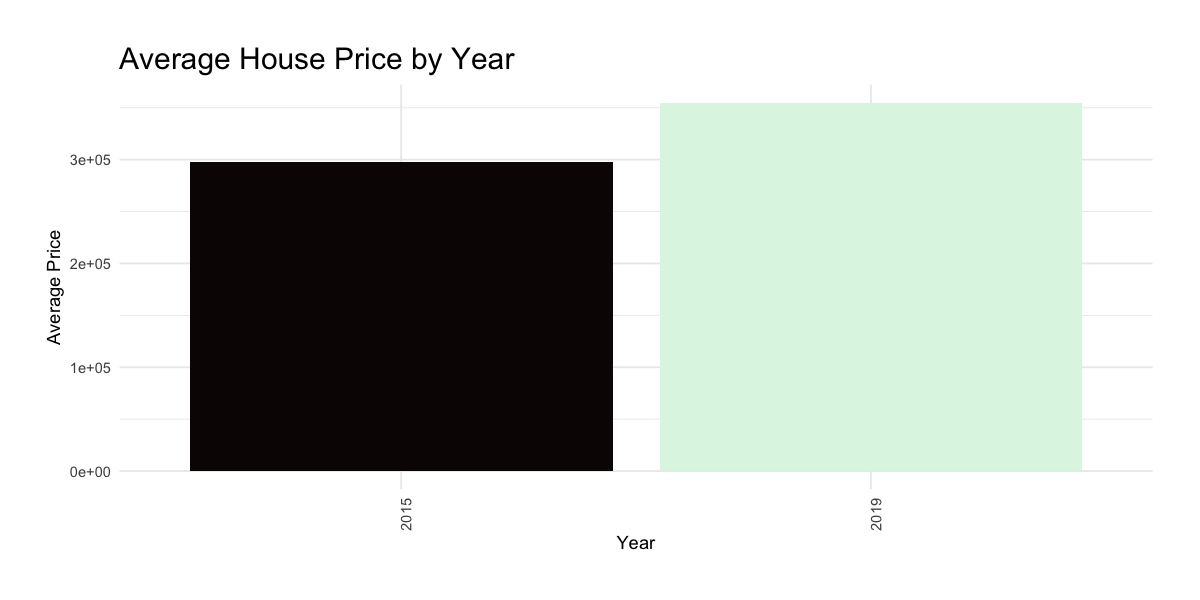

In [7]:
# Calculate the average price by year
avg_price_by_year <- house_prices_2 %>%
  group_by(year) %>%
  summarise(average_price = mean(price, na.rm = TRUE)) %>%
  arrange(year)

# drop na
avg_price_by_year <- avg_price_by_year[!is.na(avg_price_by_year$average_price),]
avg_price_by_year$year <- factor(avg_price_by_year$year)  # Ensure 'year' is treated as a factor

options(repr.plot.width=10, repr.plot.height=5)
p <- ggplot(avg_price_by_year, aes(x=year, y=average_price, fill=year)) +
  geom_bar(stat="identity", show.legend = FALSE) +
  scale_fill_viridis(discrete = TRUE, option = "mako") +
  theme_minimal() +
  theme(plot.title = element_text(size=18), axis.text.x = element_text(angle=90, hjust=1),  # Rotate labels for better readability
        plot.margin = unit(c(1,1,1,1), "cm")) +  # Adjust plot margins if needed
  labs(title = "Average House Price by Year", x = "Year", y = "Average Price")

p

In this graph we can see a strong increase in house prices in London from 2015 to 2019. The average price of a house in London has increased from around £300,000 in 2015 to over £350,000 in 2019, an increase of about 19%. Compared to the European average this reflected about equally as the global European house price rose from £218,000 in 2015 to £260,000 in 2019, an increase of about 19%. (According to Eurostat data https://ec.europa.eu/eurostat/web/housing-price-statistics/database)

___

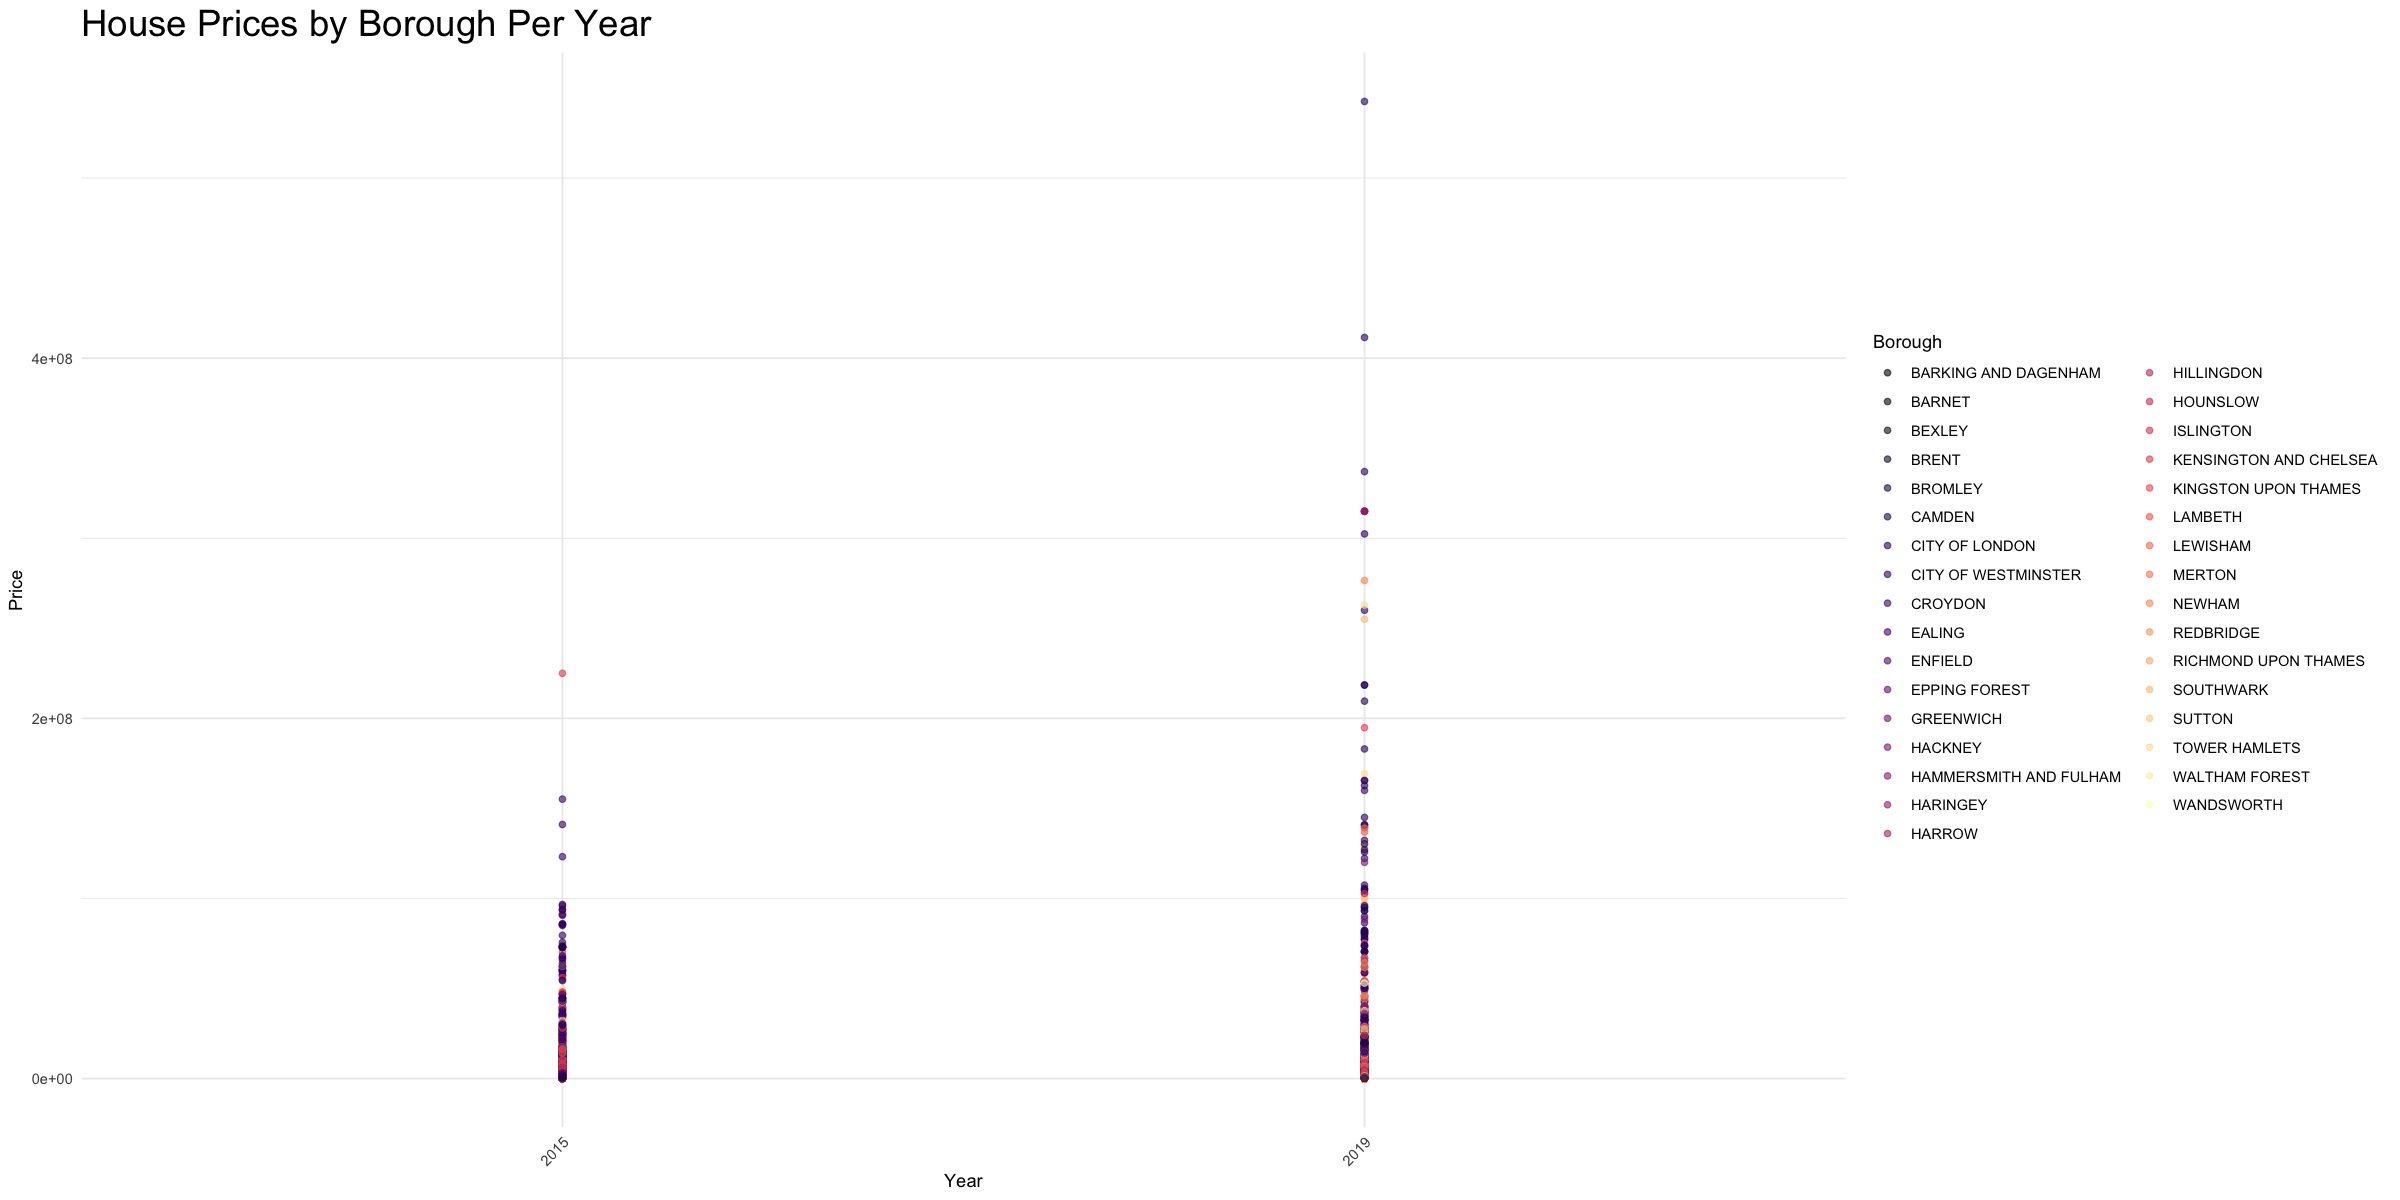

In [11]:
# scatter plots of house prices by borough per year where color is the borough
# cols = district, price, year

city_of_london_2 <- house_prices_2 %>% filter(town_city == "LONDON")


options(repr.plot.width=20, repr.plot.height=10)
ggplot(city_of_london_2, aes(x = as.factor(year), y = price, color = district)) +
  geom_point(alpha = 0.6) +  # Adjust alpha for point transparency, if desired
  scale_color_viridis_d(option='magma') +  # Use a discrete viridis color scale for clarity
  theme_minimal() +
  theme(plot.title = element_text(size=22), axis.text.x = element_text(angle = 45, hjust = 1),  # Improve readability of x-axis labels
        legend.position = "right") +  # Adjust legend position as needed
  labs(title = "House Prices by Borough Per Year",
       x = "Year",
       y = "Price",
       color = "Borough")  # Adjust axis labels and legend title


This chart is interesting because it shows some outliers each year which we could later dive into to see things like top sales by borough. Over the years, we can also see an increase in the density of the outlier sales, which is another indicator that houses at all price points are increasing in value.


___

Now looking into the top sales for 2017-2019

In [12]:

# Filter the data 
house_prices_subset <- house_prices_2 %>%
  filter(year %in% c(2015,2019))

# Find the top sale for each year
top_sales <- house_prices_subset %>%
  group_by(year) %>%
  top_n(1, price)  

head(top_sales)

transaction_unique_identifier,price,date_of_transfer,postal_code,property_type,old_new,duration,PAON,SAON,street,locality,town_city,district,county,PPD_category_type,record_status,year
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
{55BDCAE6-C87A-521D-E053-6B04A8C0DD7A},225000000,2015-12-01 00:00,SW7 4DN,O,N,L,"KENSINGTON FORUM, 97",,CROMWELL ROAD,,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,B,A,2015
{06C9F488-12CE-9388-E063-4804A8C0BD98},542540820,2019-11-20 00:00,NW5 2HB,O,N,F,36,,FORTESS ROAD,,LONDON,CAMDEN,GREATER LONDON,B,A,2019


2017 largest sale: Holiday Inn Kensington Forum

Entire office building in London for 225,000,000. 

![Alt text](image.png)

2019 largest sale: Fortress Works

Entire commercial office building for 542,540,820.

![Alt text](image-5.png)

___

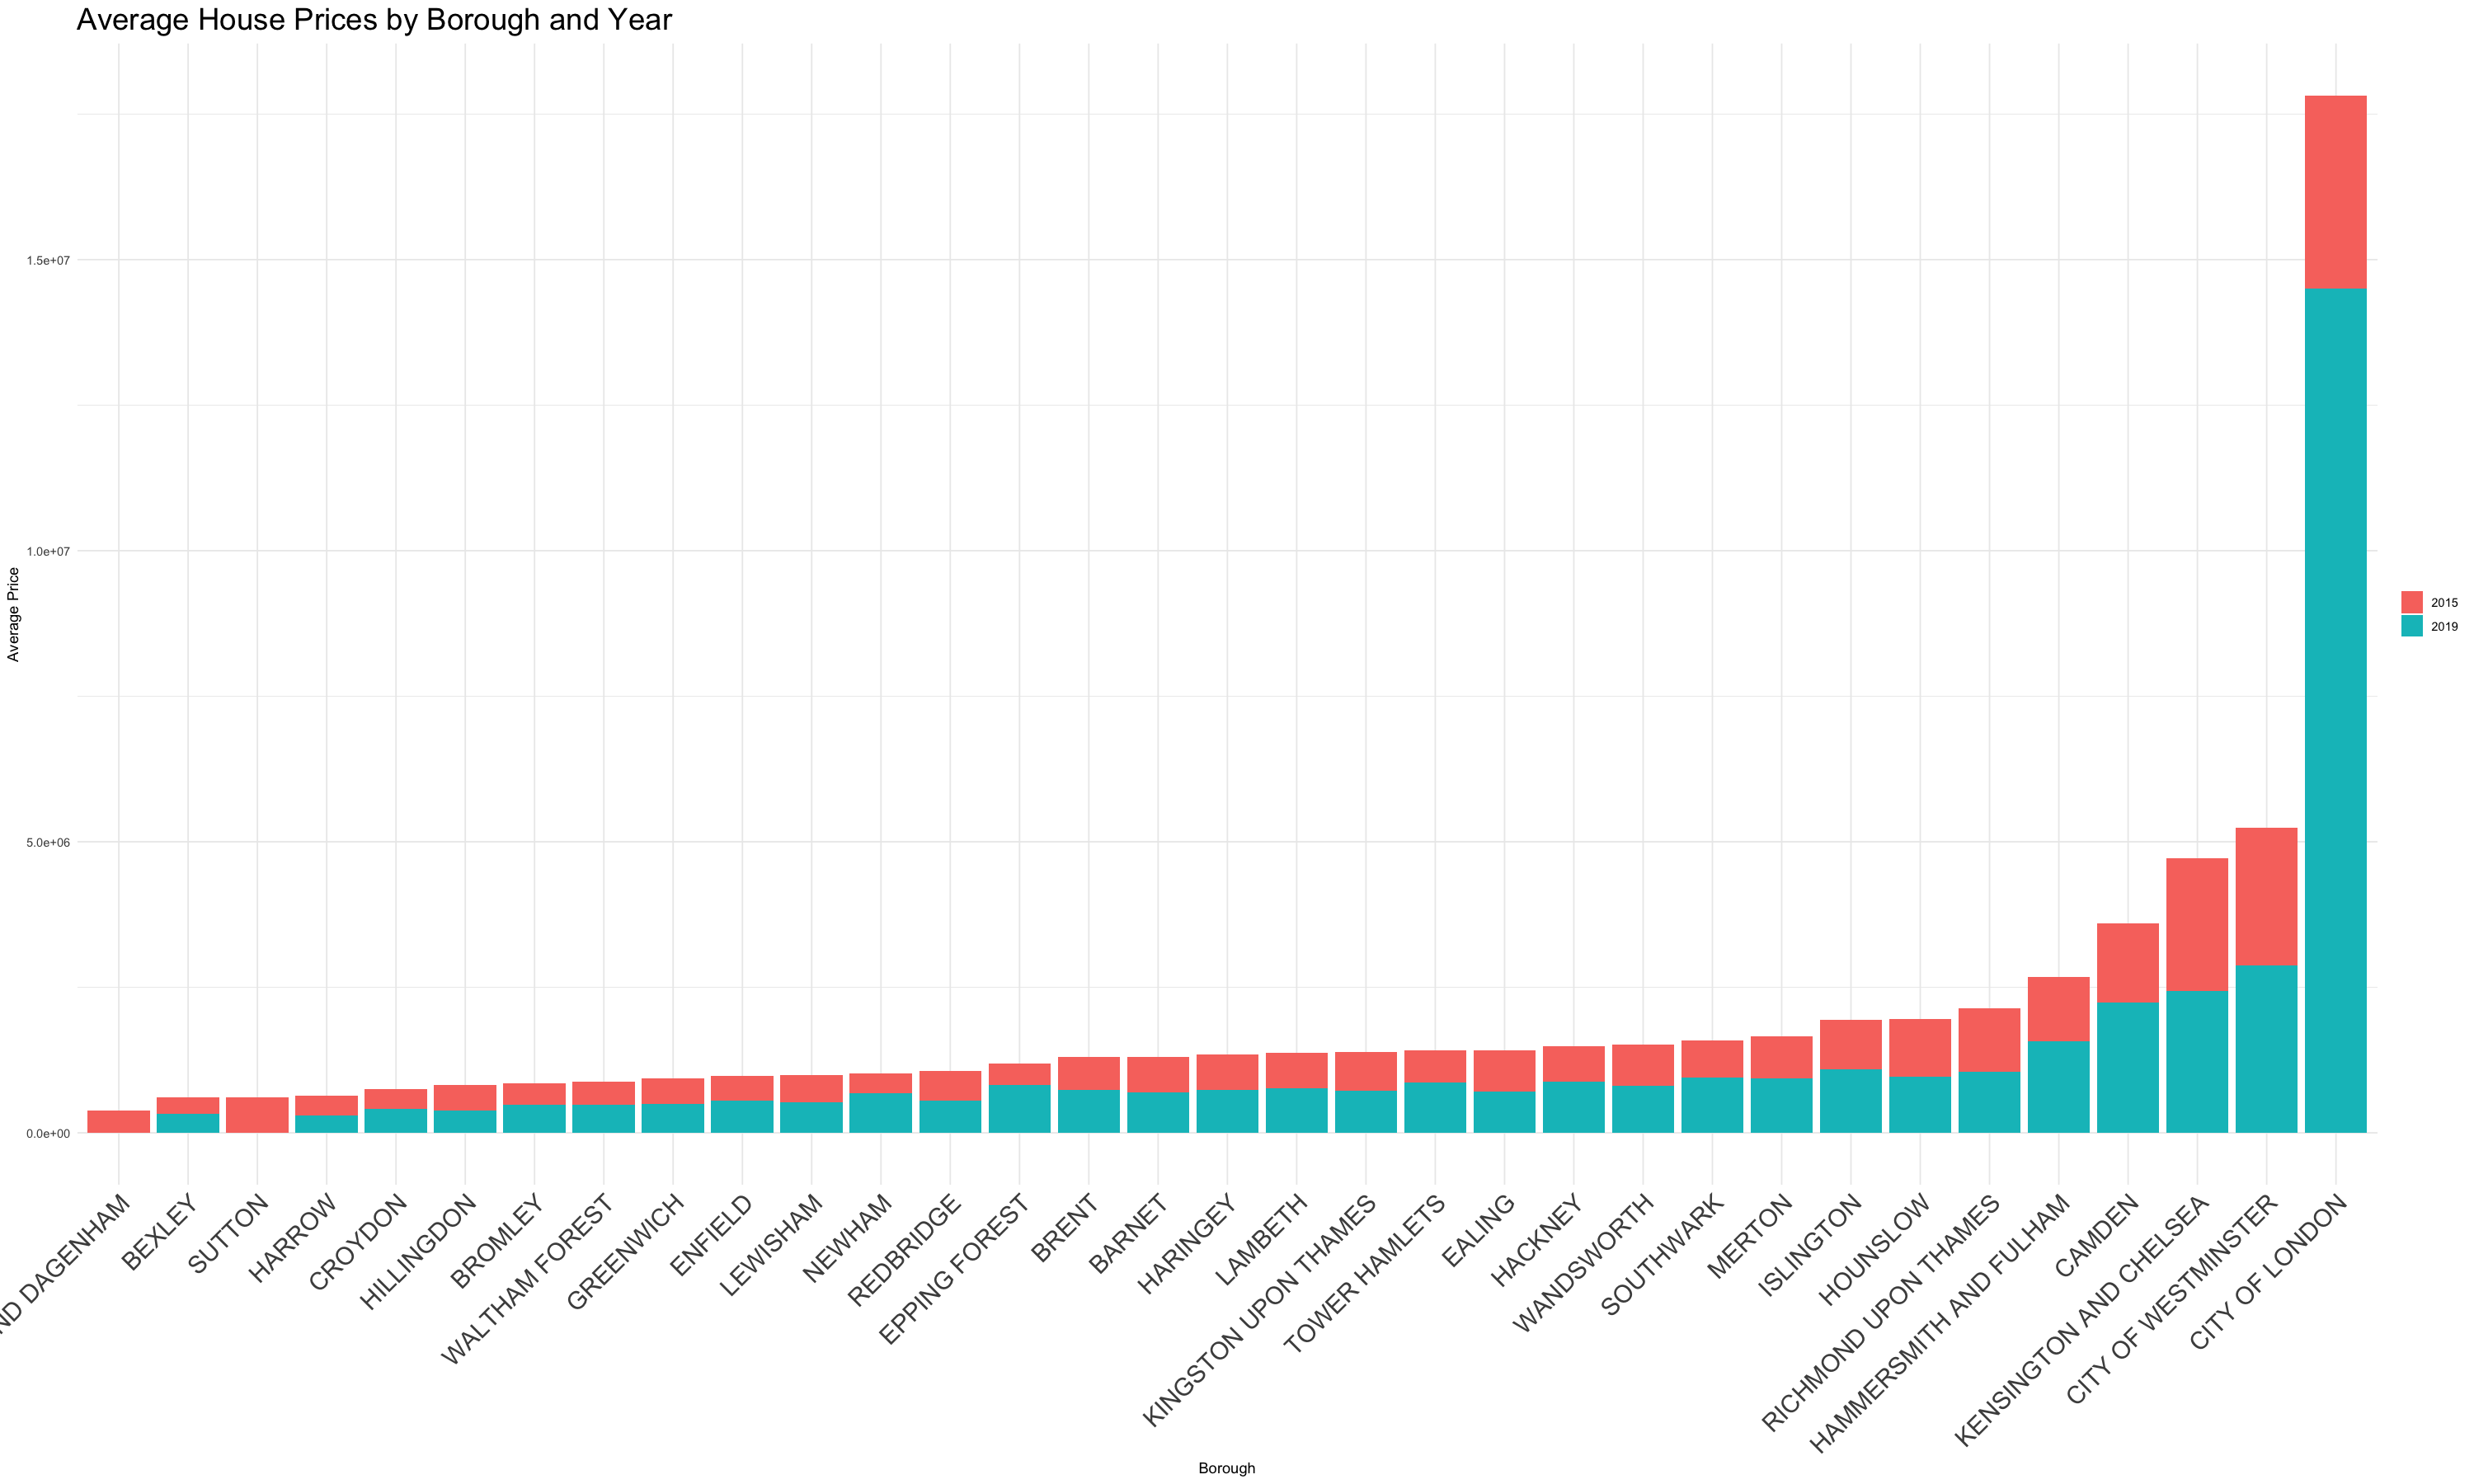

In [36]:
# faceted bar plots of house prices by borough per year with the x-axis being the year, y-axis being the average price, and the bars being the boroughs
# cols = borough, price, year

city_of_london_2$date_of_transfer <- as.Date(city_of_london_2$date_of_transfer)
city_of_london_2$year <- format(city_of_london_2$date_of_transfer, "%Y")  # Extract year

#cast year to int
city_of_london_2$year <- as.integer(city_of_london_2$year)

avg_price_by_borough_year <- city_of_london_2 %>%
  group_by(district, year) %>%
  summarise(average_price = mean(price, na.rm = TRUE), .groups = 'drop') %>%
  arrange(district, year)


total_avg_price_by_district <- avg_price_by_borough_year %>%
  group_by(district) %>%
  summarise(total_average_price = sum(average_price), .groups = 'drop')


avg_price_by_borough_year <- avg_price_by_borough_year %>%
  inner_join(total_avg_price_by_district, by = "district") %>%
  mutate(district = reorder(district, total_average_price))



options(repr.plot.width=25, repr.plot.height=15)


ggplot(avg_price_by_borough_year, aes(x = factor(district), y = average_price, fill = factor(year))) +
  geom_bar(stat = "identity", position = "stack") +  # Use 'stack' position for stacked bars
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=18), plot.title = element_text(size=22),  # Adjust x-axis labels for better readability
        legend.title = element_blank()) +  # Optionally hide the legend title if it's clear from the context
  labs(title = "Average House Prices by Borough and Year",
       x = "Borough",
       y = "Average Price")



We can see that some boroughs have a higher average price growth than others. For example, Sutton have have very few sales in 2019.  It is interesting to note some neighborhoods like Ealing have exceedingly high sales prices in 2015 but have a taper in 2019. Another interesting point is that the City of London has extraordinarily high sales growth from 2015-2019.

#### C2. Is there a significant relationship between the price of a property and the time of year it is sold? Does this vary with type of property?


Preprocess

In [15]:
# get monthly average house prices for the city of london

# Assuming your dataset is named 'house_prices'
house_prices$date_of_transfer <- as.Date(house_prices$date_of_transfer)
house_prices$year <- format(house_prices$date_of_transfer, "%Y")  # Extract year and month
house_prices$month <- format(house_prices$date_of_transfer, "%m")  # Extract year and month

monthly_avg_prices <- house_prices %>%
  group_by(year, month) %>%
  summarise(average_price = mean(price)) %>%
  ungroup()

# drop 2016 data
monthly_avg_prices <- monthly_avg_prices[!monthly_avg_prices$year == 2016,]

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


___

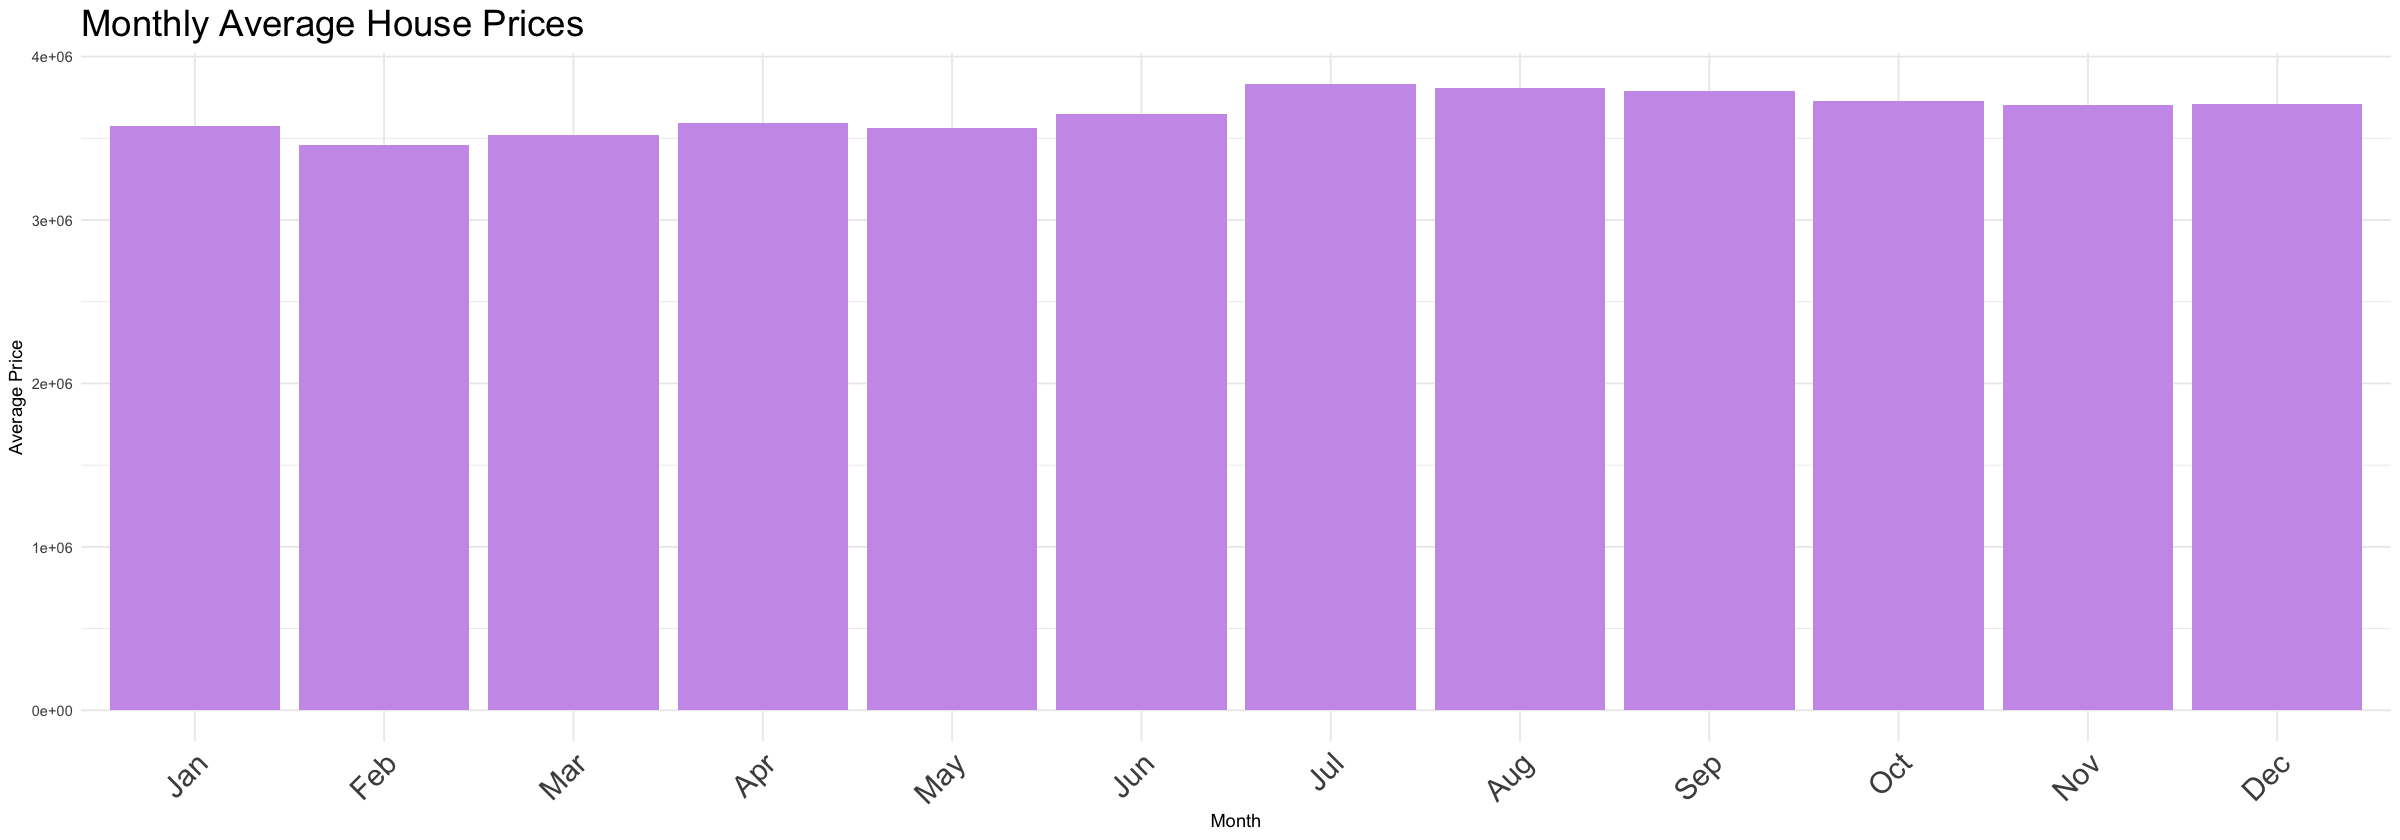

In [16]:


options(repr.plot.width=20, repr.plot.height=7)
ggplot(monthly_avg_prices, aes(x = month, y = average_price)) +
  geom_bar(stat = "identity", fill = "#cd9deb") +
    scale_x_discrete(labels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")) +

  theme_minimal() +
  labs(title = "Monthly Average House Prices", x = "Month", y = "Average Price") +
  theme(plot.title = element_text(size=22), axis.text.x = element_text(angle = 45, hjust = 1, size=18))  # Rotate x-axis labels for better readability

We can see a slight trend upwards in the summer months for all types of properties. This is interesting because it could be due to the fact that people are more likely to move in the summer months. Additionally, January seems like an unusually high month for sales, which could be an accounting reason to do with the new year given that this dataset includes commercial sales.

___

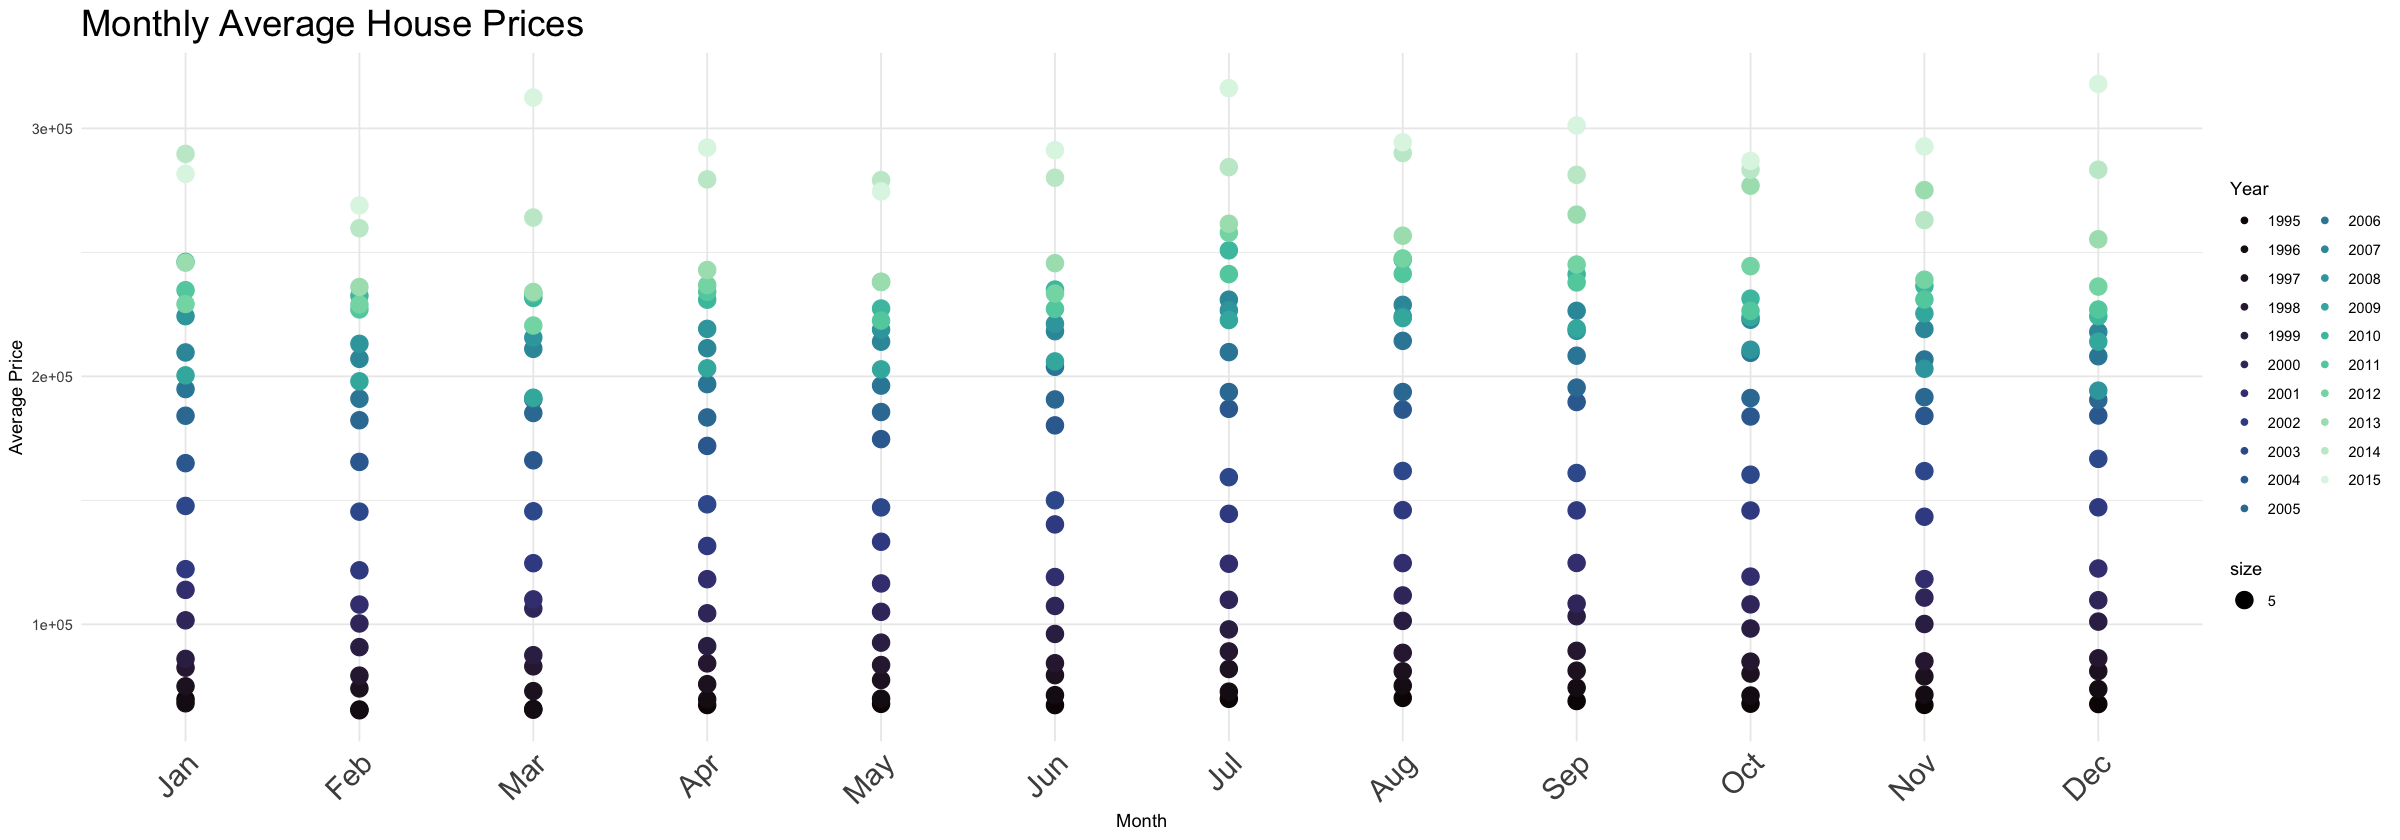

In [33]:
# plot all on a scatter plot 
# cols = month, price

options(repr.plot.width=20, repr.plot.height=7)

ggplot(monthly_avg_prices, aes(x = factor(month), y = average_price, color = factor(year), size=5)) +
  geom_point() +
  scale_color_viridis_d(option='mako') +  # Use a discrete viridis color scale for clarity
  scale_x_discrete(labels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")) +

  labs(title = "Monthly Average House Prices",
       x = "Month",
       y = "Average Price",
       color = "Year") +
  theme_minimal() +
  theme(plot.title = element_text(size=22), axis.text.x = element_text(angle = 45, hjust = 1, size=18))  # Improve readability of month labels


We can see from this graph that there is pretty consistent seasonality in the average price of a house in London. The average price of a house in London is consistently higher in the summer and beginning of fall months, and lowest in the winter months. This makes sense weather wise because people are more likely to move in the summer months when the weather is better. We can also see in this graph there is differences in seasonality over the years, with recent years having a higher average towards Jun/Jul and the bluer features towards Aug/Sep.
___

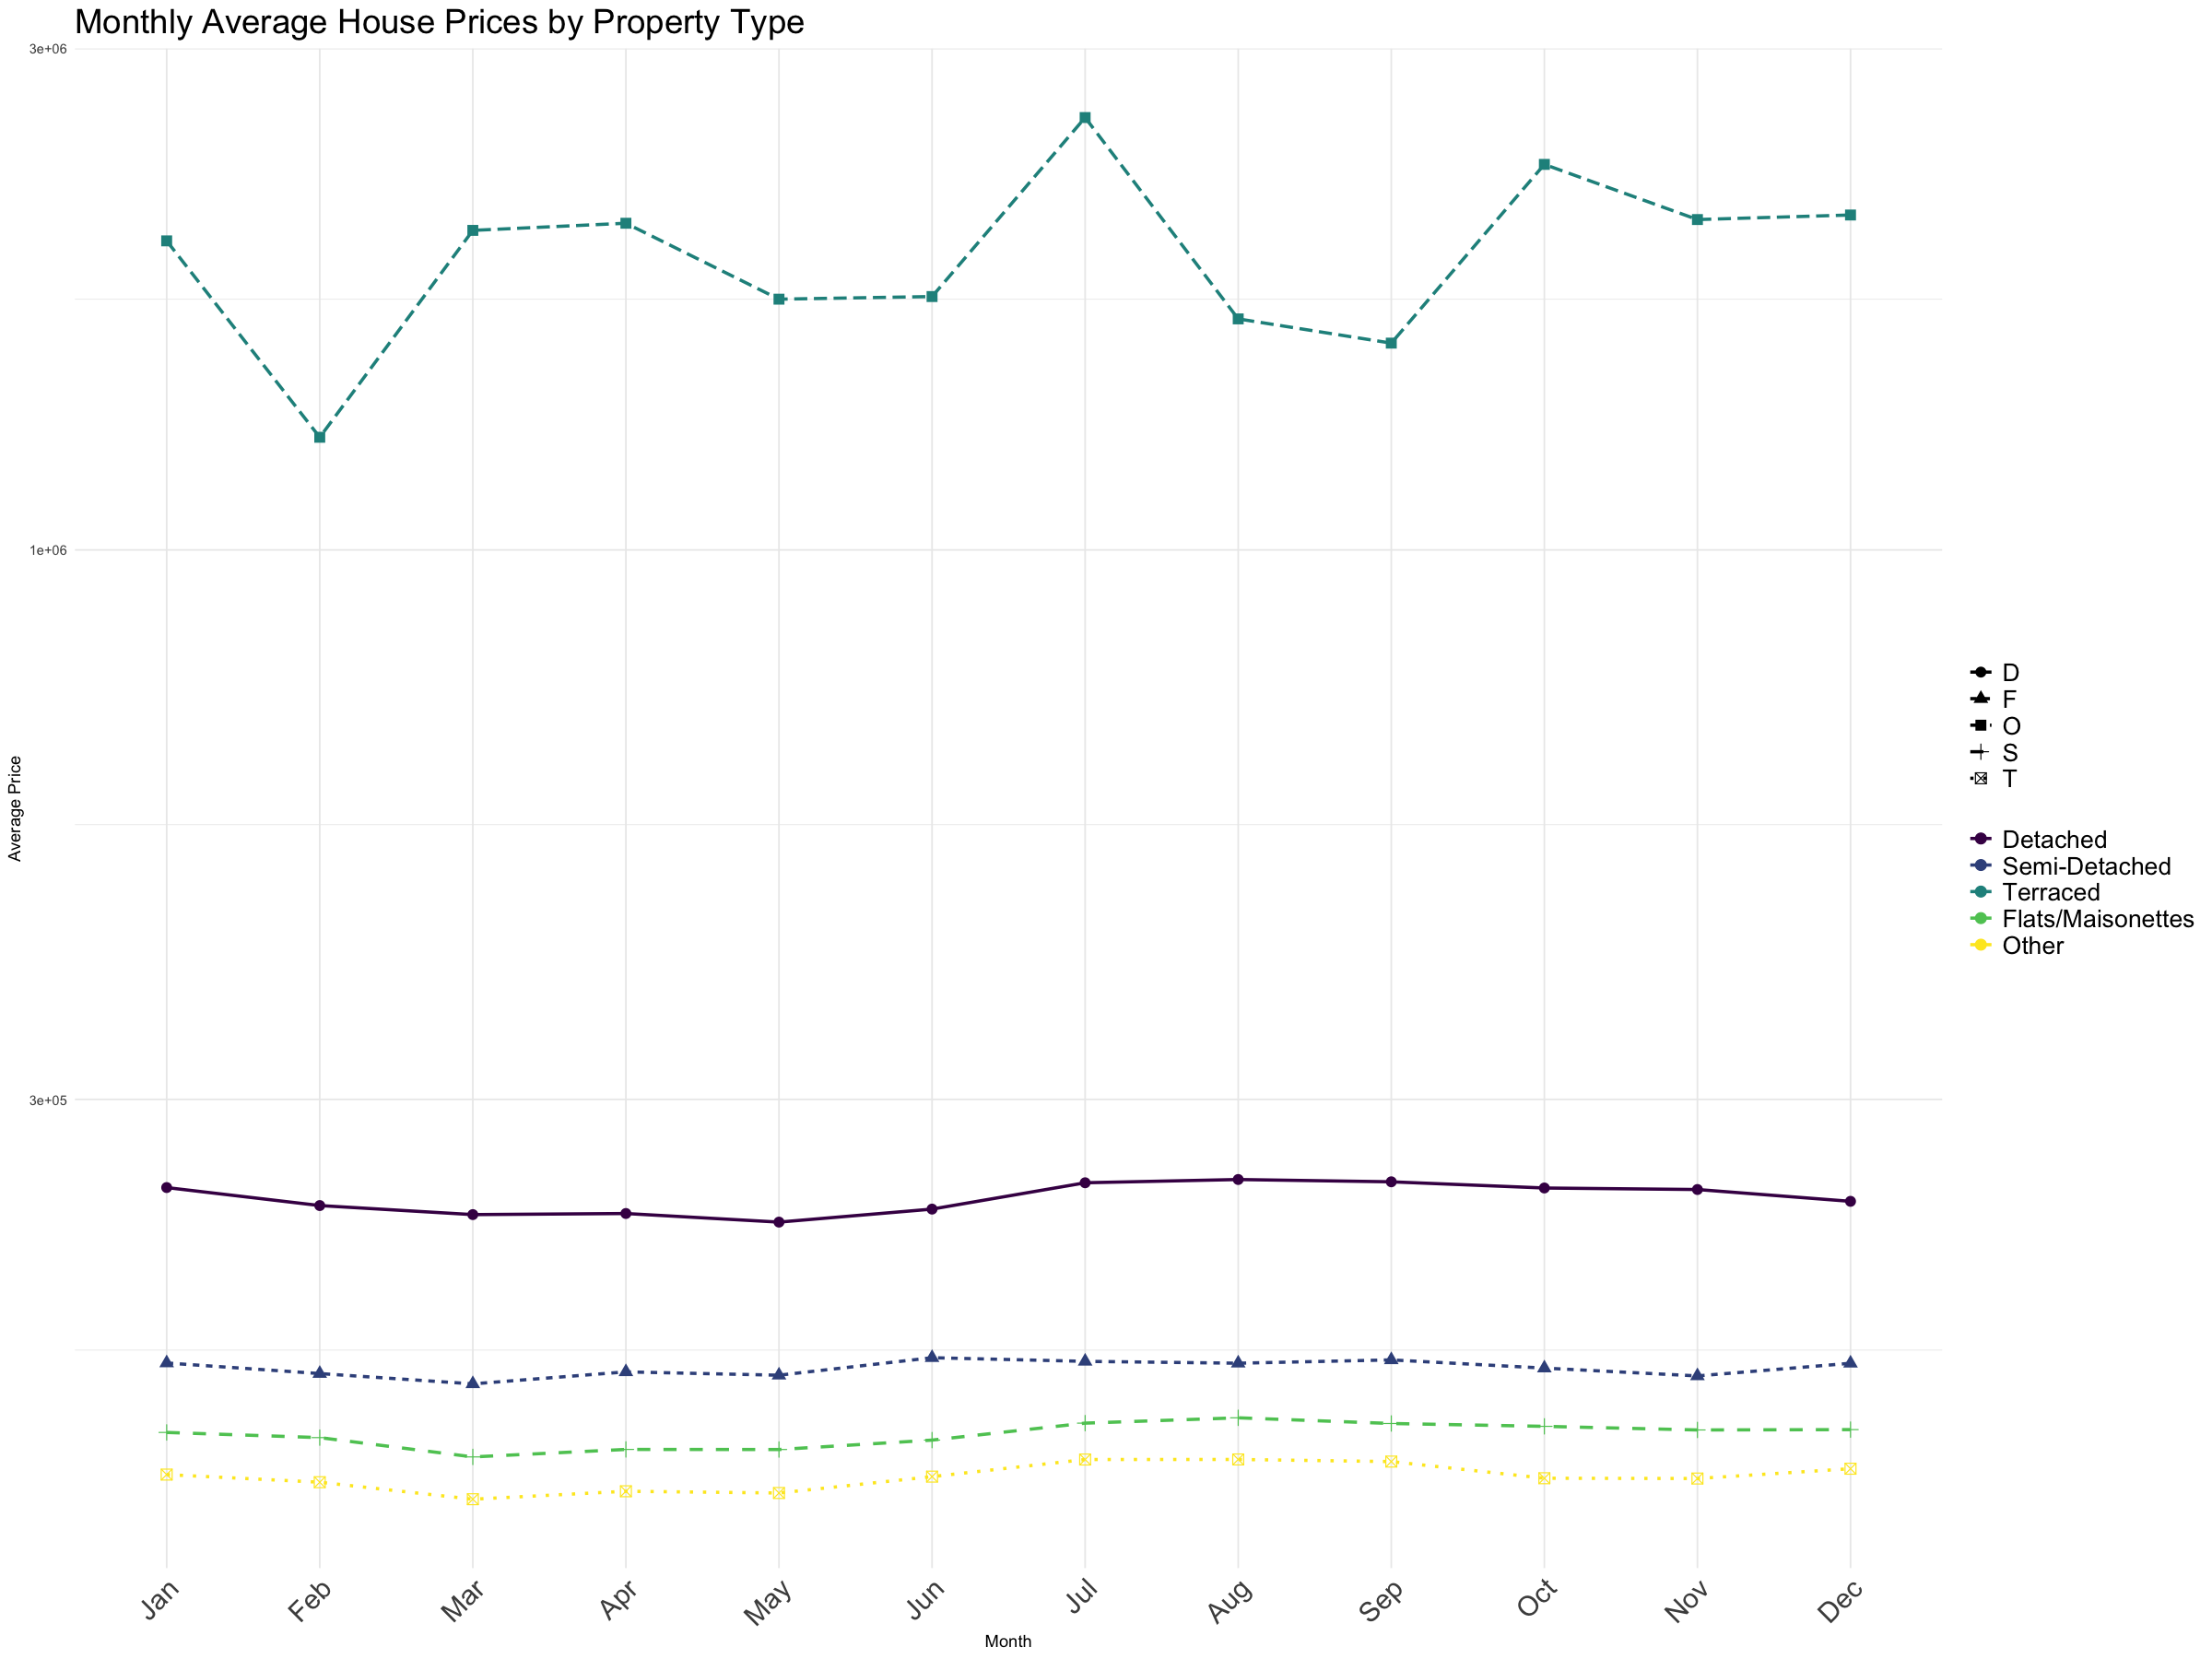

In [31]:
city_of_london_avg_prices <- house_prices %>%
  group_by(month, property_type) %>%
  summarise(price = mean(price, na.rm = TRUE), .groups = 'drop')

city_of_london_avg_prices <- city_of_london_avg_prices %>%
  arrange(month, price) %>%
  mutate(ordering = row_number())


# Mapping for property types
property_type_labels <- c(D = "Detached", S = "Semi-Detached", T = "Terraced", F = "Flats/Maisonettes", O = "Other")


# Update plot with sorting and color mapping
options(repr.plot.width=20, repr.plot.height=15)

ggplot(city_of_london_avg_prices, aes(x = factor(month), y = price, group = property_type, color = factor(property_type, labels = property_type_labels))) +
  geom_line(aes(linetype = factor(property_type)), size=1) +
  geom_point(aes(shape = factor(property_type)), size=3) +
  scale_color_viridis(discrete = TRUE, option = "viridis") +
  scale_x_discrete(labels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")) +
  theme_minimal() +
  scale_y_continuous(trans='log10') +
  labs(title = "Monthly Average House Prices by Property Type", x = "Month", y = "Average Price") +
  theme(plot.title = element_text(size=22), 
        axis.text.x = element_text(angle = 45, hjust = 1, size=18), 
        legend.title = element_blank(),
        legend.text = element_text(size=16))


Here we can see that the seasonality of the house prices is drastically different for each type of property. For example, the detached properties move up and down in price throughout the year, with high points in July, October, February and April. the Flats express the seasonality we expect from the previous graph, with the highest prices in summer and the lowest in the winter. The terraced and semi-detached properties have a similar seasonality to the flats, but the prices are relatively more flat. Other has significant variation, but may be attributed to lower sales and variety of properties within a catch all class. 

___